In [2]:
# GLOBAL DEFINITIONS FOR THE ANALYSIS


# FILES OF INTEREST
#### _fcm.csv -> contains informations about trajectories as the class, the lenght and duration of trah, the average speed and accel.
#### _stats.csv -> """" [radundant in lenght,speed,time] 
#### _presence.csv  -> """" about where, how much time, and id of the "one point" trajectories
#### _timed_fluxes.csv -> contains informations about number of trajectories passing in each poly at some time  
#### _class_i.txt -> contains list of integers of polies that of the subnets. i = [0,1,2,3] -> in increasing order of velocity
#### i_class_subnet.txt -> contains list of integers of polies of the subnet i = [0,1,2,3] -> i = 0, the slowest graph without those quicker, -> 1 the second one without those quicker and so on, arriving to the quickest that is taken as it is. This think must be used to reclassify people's trajectories, hoping to observe a fondamental diagram.

###### This notebook contains the analysis functions on the data coming out from data_analysis.cpp.
###### It is thought for the analysis day by day and aggregated from different days.
###### data_analysis.cpp produces in output the following important files described in the below cell in their columns, here some intuitive description:


##### SPECIFICATION WORKING DIRECTORIES:
##### 1) save_basedir: In general each day's plot is contain in a folder, save_basedir + day + plot ... 
##### 2) dir_weights: is the one used for the .fluxes, .fluxes.sub files containing information about fluxes in the poly, and list of int ids of polies for each subnetwork
##### 3) fcm: list of dataframe from _fcm.csv.
###### 3.1) columns: [id_act;lenght;time;av_speed;v_max;v_min;cnt;av_accel;a_max;class;p]
###### 3.2) I use them to build fondamental diagram, distribution of lenghts, of times for each class. (I use it as a max for stats)
##### 4) stats
###### 4.1) columns: [id_act;lenght;time;av_speed;ndat;front_lat;front_lon;tail_lat;tail_lon;start_time;end_time]
##### 4.2 I use it in couple with fcm files for the analysis. 
##### 5) timed_fluxes:
###### 5.1) columns: [time;id;id_local;nodeF;nodeT;length;total_fluxes;n_traj_FT;n_traj_TF;cid]


In [3]:
# initiialize dataframe of the above mentioned files, providing an ordered lists that all together contain informations about all the days of the analysis.
import pandas as pd 
import os
import numpy as np
import json
import datetime
from collections import defaultdict
#from analysis import *
#------------------------------------------------------- SAVE 
bounding_box = [(44.463121,11.287085),(44.518165,11.287085),(44.518165,11.367472),(44.463121,11.367472)]
WORKSPACE = os.environ['WORKSPACE'] 
#WINDOWS
savebase_dir = r'C:\Users\Alberto\Desktop\codice\city-pro\output\bologna_mdt_detailed\plot'
# UBUNTU 
savebase_dir = os.path.join(WORKSPACE,'city-pro','output','bologna_mdt_detailed')
#------------------------------------------------------- WEIGHTS
dir_weights= os.path.join(savebase_dir,'weights') 
#------------------------------------------------------- DATA FILES
BaseFileName = 'bologna_mdt'
#StrDates = ['2022-12-30','2022-12-31','2023-01-01','2022-05-12','2022-11-11','2022-07-01','2022-08-05','2022-01-31','2023-03-18']
#days = [datetime.datetime.timestamp(datetime.datetime(2022,12,30,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,12,31,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2023,1,1,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,5,12,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,11,11,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,7,1,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,8,5,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,1,31,0,0,0)),datetime.datetime.timestamp(datetime.datetime(2022,3,18,0,0,0))]
days = [datetime.datetime.timestamp(datetime.datetime(2022,5,12,0,0,0))]
StrDates = ['2022-05-12']
fcm = []
stats = []
timed_fluxes = []
for date in StrDates:
    fcm.append(pd.read_csv(os.path.join(savebase_dir,BaseFileName+'_'+date+'_'+date+'_fcm.csv'),delimiter = ';'))
    stats.append(pd.read_csv(os.path.join(savebase_dir,BaseFileName+'_'+date+'_'+date+'_stats.csv'),delimiter=';'))
    timed_fluxes.append(pd.read_csv(os.path.join(savebase_dir,BaseFileName+'_'+date+'_'+date+'_timed_fluxes.csv'),delimiter=';'))
s_dir = []
for dir_ in range(len(StrDates)):
    DayDir = os.path.join(savebase_dir,StrDates[dir_])
    if not os.path.exists(DayDir):
        os.mkdir(DayDir)
        DayPlotDir = os.path.join(savebase_dir,StrDates[dir_],'plot')
        if not os.path.exists(DayPlotDir):
            os.mkdir(DayPlotDir)
    else:
        DayPlotDir = os.path.join(DayDir,'plot')
        if not os.path.exists(DayPlotDir):
            os.mkdir(DayPlotDir)
    s_dir.append(DayPlotDir)
#------------------------------------------------------- TIME VARIABLES (casual I do not remember when I use them)
day_in_sec = 24*3600
dt = 15*60
iterations = day_in_sec/dt
#------------------------------------------------------- DICT CLASS
dict_class = defaultdict(dict)


# Rewrite More Clearly

# Foundamental Diagram

In [4]:
# 2 RUN
import matplotlib.pyplot as plt
import pylab
def plot_them_all(dict_idx,save_dir,day,idx,dict_name):
    '''
    Plots for slowest and quickest classes of velocity:
    1) path in DV plane
    2) average velocity for density
    3) density per time
    4) velocity in time 
    
    '''
    # 1a) CICLO DI ISTERESI VELOCITà DENSITà (CLASSE LENTA)
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    x = pd.DataFrame(dict_idx).dropna(how = 'any')['population'].to_numpy()
    y = pd.DataFrame(dict_idx).dropna(how = 'any')['velocity'].to_numpy()
    u = [x[i+1]-x[i] for i in range(len(x)-1)]
    v = [y[i+1]-y[i] for i in range(len(y)-1)]
    u.append(x[len(x)-1] -x[0])
    v.append(y[len(y)-1] -y[0])
    plt.quiver(x,y,u,v,angles='xy', scale_units='xy', scale=1,width = 0.0025)
    plt.xlabel('number people')
    plt.ylabel('velocity')
    plt.title(str(dict_name[idx]))
    plt.savefig(os.path.join(save_dir,'{0}_class_trejectory_in_DV_{1}.png'.format(day,dict_name[idx])),dpi = 200)
    plt.show()

    # 2a) DENSITà VELOCITà (CLASSE LENTA)
    nx,binsx = np.histogram(x,range = (min(x),max(x)))
    ny,binsy = np.histogram(y,range = (min(y),max(y)))
    y_avg = np.zeros(len(binsx))
    y_dev = np.zeros(len(binsx))
    for dx in range(len(binsx)-1):
        idx_ = np.array([True if xi>=binsx[dx] and xi<=binsx[dx+1] else False  for xi in x])
        y_avg[dx] += np.mean(y[idx_])
        y_dev[dx] = np.std(y[idx_])
    print('mean:\t',y_avg[:-1],'\nstd-dev:\t',y_dev[:-1],'\ndev/mean:\t',y_dev[:-1]/y_avg[:-1])
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    plt.plot(binsx[:-1],y_avg[:-1])
    plt.plot(binsx[:-1],y_avg[:-1]+y_dev[:-1])
    plt.plot(binsx[:-1],y_avg[:-1]-y_dev[:-1])
    plt.xlabel('number people')
    plt.ylabel('velocity')
    plt.title(str(dict_name[idx]))
    plt.legend(['mean','mean+std','mean-std'])
    plt.savefig(os.path.join(save_dir,'{0}_class_averageV_per_D_{1}.png'.format(dict_name[idx],day)),dpi = 200)
    plt.show()

    # 3a) TEMPO-NUMERO PERSONE (LENTI e VELOCI)
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    plt.scatter(pd.DataFrame(dict_idx)['time'].to_numpy(),pd.DataFrame(dict_idx)['population'].to_numpy())
    plt.xlabel('time')
    plt.ylabel('number people')
    plt.title(str(dict_name[idx]))
    plt.savefig(os.path.join(save_dir,'{0}_class_time_number_people_{1}.png'.format(dict_name[idx],day)),dpi = 200)
    #plt.show()
    # 4a) TEMPO-VELOCITà (LENTI e VELOCI)
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    plt.scatter(pd.DataFrame(dict_idx)['time'].to_numpy(),pd.DataFrame(dict_idx)['velocity'].to_numpy())
    plt.xlabel('time')
    plt.ylabel('velocity')
    plt.title(str(dict_name[idx]))
    plt.savefig(os.path.join(save_dir,'{0}_class_time_velocity_{1}.png'.format(dict_name[idx],day)),dpi = 200)    
    plt.show()
def plot_prob_presence_conditioned_byclassandtime(dict_class_features,dict_name,idx,save_dir,name):
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    legend = []
    for idx in dict_name.keys():
        pop_cond_class = np.array(dict_class_features[dict_name[idx]]['population'])/np.sum(np.array(dict_class_features[dict_name[idx]]['population']))
        time = np.array(dict_class_features[dict_name[idx]]['time'])
        plt.scatter(time,pop_cond_class)
        plt.xlabel('time')
        plt.ylabel('number people rescaled by numerosity class')
        legend.append(str(dict_name[idx]))    
    plt.legend(legend)
    plt.savefig(os.path.join(save_dir,'comparison_class_time_number_people_{}.png'.format(name[i])),dpi = 200)
    plt.show()

def plot_velocity_conditioned_byclassandtime(dict_class_features,dict_name,idx,save_dir,name):
    legend = []
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    for idx in dict_name.keys():
        x = pd.DataFrame(dict_class_features[dict_name[idx]]).dropna(how = 'any')['population'].to_numpy()
        y = pd.DataFrame(dict_class_features[dict_name[idx]]).dropna(how = 'any')['velocity'].to_numpy()
        nx,binsx = np.histogram(x,range = (min(x),max(x)))
        ny,binsy = np.histogram(y,range = (min(y),max(y)))
        y_avg = np.zeros(len(binsx))
        y_dev = np.zeros(len(binsx))
        for dx in range(len(binsx)-1):
            idx_ = np.array([True if xi>=binsx[dx] and xi<=binsx[dx+1] else False  for xi in x])
            y_avg[dx] += np.mean(y[idx_])
            y_dev[dx] = np.std(y[idx_])
        print('mean:\t',y_avg[:-1],'\nstd-dev:\t',y_dev[:-1],'\ndev/mean:\t',y_dev[:-1]/y_avg[:-1])
        plt.plot(binsx[:-1],y_avg[:-1])
        plt.fill_between(binsx[:-1], y_avg[:-1]-y_dev[:-1], y_avg[:-1]+y_dev[:-1])
        plt.xlabel('number people')
        plt.ylabel('velocity')
        legend.append(str(dict_name[idx]))    
    plt.legend(legend)
    plt.savefig(os.path.join(save_dir,'all_classes__averageV_per_D_{}.png'.format(name[i])),dpi = 200)
    plt.show()
         

## Initialize:
#### list_bool_days_with_quickest_velocity_too_high: Tells dates for which I have too high velocities
#### list_dict_name: Index Day: Value {cl:quickest,cl2:slowest}


In [11]:
# 2 MODIFY
from collections import defaultdict
from multiprocessing import Pool
import datetime
import pandas as pd
import numpy as np

def indx_vel(fcm,dict_vel,i):
    '''
    Output: dict: {velocity:'velocity class in words: (slowest,...quickest)]}
    '''
    exist_class_with_excessive_velocity = False
    for f,fc in fcm[i].groupby('class'):
        if f!=10:
            vel = np.mean(fc['av_speed'].to_numpy())
            if vel<50:
                dict_vel[f] = vel
                print('velocity of class {0} is: {1} m/s'.format(f,vel))
            else:
                exist_class_with_excessive_velocity = True
    dict_vel = dict(sorted(dict_vel.items(),key = lambda item:item[1]))
    dict_name = defaultdict(dict)
    number_classes = len(dict_vel.keys()) 
    for i in range(number_classes):
        if i<number_classes/2:
            dict_name[list(dict_vel.keys())[i]] = '{} slowest'.format(i+1)
        elif i<number_classes==2:
            dict_name[list(dict_vel.keys())[i]] = 'middle velocity class'
        else:
            dict_name[list(dict_vel.keys())[i]] = '{} quickest'.format(number_classes - i)             
    return dict_vel,dict_name,exist_class_with_excessive_velocity

def FilterStatsByClass(fcm,i,idx,stats):
    '''
    fcm: is needed to categorize trajectories based on their velocity class. (average speed)
    stats: is needed to place them in time (also te duration).
    '''
    fcm_idx = fcm[i].groupby('class').get_group(idx)['id_act'].to_numpy()
    mask_idx = [True if x in fcm_idx else False for x in stats[i]['id_act'].to_numpy()]
    f_idx = stats[i].loc[mask_idx]
    f_idx = f_idx.sort_values(by = 'start_time')
    return f_idx

list_bool_days_with_quickest_velocity_too_high = []
list_dict_vel = []
list_dict_name = []
for i in range(len(stats)):# for each day we have the analysis
    if i>=0:
        print('day:\t',StrDates[i])
        dict_vel = defaultdict(dict)
        dict_vel,dict_name,exist_class_with_excessive_velocity = indx_vel(fcm,dict_vel,i) # associate the velocity status to the index
        list_bool_days_with_quickest_velocity_too_high.append(exist_class_with_excessive_velocity)
        list_dict_vel.append(dict_vel)
        list_dict_name.append(dict_name)
        dict_class_features = defaultdict(dict)
        print("dict_vel: ",dict_vel)
        print("dict_name: ",dict_name)
        if 1==1:
            # PRODUCE FOUNDAMENTAL DIAGRAM FILETIME,POLULATION,VELOCITY PER CLASS
            for idx in dict_name.keys():
                print('dict_name.keys(): {}'.format(idx))
                print('class {}'.format(dict_name[idx]))
                f_idx = FilterStatsByClass(fcm,i,idx,stats) # take (velocity and time of the group considered)
                dict_class_features[dict_name[idx]] = {'time':[],'population':[],'velocity':[]}
                for t in range(int(iterations)):
                    # EXTRACT AVERAGE VELOCITY PER CLASS
                    mask_idx = [True if (int(x['start_time'])>int(days[i])+t*dt and int(x['start_time'])<int(days[i])+(t+1)*dt) or (int(x['end_time'])>int(days[i])+t*dt and int(x['end_time'])<int(days[i])+(t+1)*dt) else False for _,x in f_idx.iterrows()]
                    df_idx = f_idx.loc[mask_idx] # consider the time interval
                    # EXTRACT NUMBER OF PEOPLE  
                    mask_bin_for_fcm = [True if (int(x['start_time'])>int(days[i])+t*dt and int(x['start_time'])<int(days[i])+(t+1)*dt) or (int(x['end_time'])>int(days[i])+t*dt and int(x['end_time'])<int(days[i])+(t+1)*dt) else False for _,x in stats[i].iterrows()]
                    df_fcm_bin = stats[i].loc[mask_bin_for_fcm]
                    if t%12==0:
                        print('iteration: ',t,' timestamp: ',int(days[i])+t,'number of people class {}:\t'.format(idx),len(df_fcm_bin)) # FONDMANETAL DIAGRAM FOR ALL CLASSES
                    dict_class_features[dict_name[idx]]['time'].append(t)
                    dict_class_features[dict_name[idx]]['population'].append(len(df_fcm_bin))
                    dict_class_features[dict_name[idx]]['velocity'].append(np.mean(df_idx['av_speed'].to_numpy()))
                plot_them_all(dict_class_features[dict_name[idx]],s_dir[i],StrDates[i],idx,dict_name)    
                pd.DataFrame(dict_class_features[dict_name[idx]]).to_csv(os.path.join(s_dir[i],'class_{}_for_fondamental_diagram.csv'.format(dict_name[idx])),';')
            save_all = os.path.join(savebase_dir,'all')
            if not os.path.exists(save_all):
                os.mkdir(save_all)
            plot_prob_presence_conditioned_byclassandtime(dict_class_features,list_dict_name[i],idx,save_all,StrDates)    
            plot_velocity_conditioned_byclassandtime(dict_class_features,list_dict_name[i],idx,save_all,StrDates)

# THIS PICE OF CODE IS USED TO PRODUCE THE FUNDAMENTAL DIAGRAM FOR ALL CLASSES   



day:	 2022-05-12
velocity of class 0 is: 2.2194770495226 m/s
velocity of class 1 is: 7.1584226530247514 m/s
velocity of class 2 is: 14.266391619372023 m/s
velocity of class 3 is: 29.376733131817808 m/s
defaultdict(<class 'dict'>, {0: '1 slowest', 1: '2 slowest', 2: '2 quickest', 3: '1 quickest'})


In [12]:
list_bool_days_with_quickest_velocity_too_high = []
list_dict_vel = []
list_dict_name = []
for i in range(len(stats)):# for each day we have the analysis
    if i>=0:
        print('day:\t',StrDates[i])
        dict_vel = defaultdict(dict)
        dict_vel,dict_name,exist_class_with_excessive_velocity = indx_vel(fcm,dict_vel,i) # associate the velocity status to the index
        list_bool_days_with_quickest_velocity_too_high.append(exist_class_with_excessive_velocity)
        list_dict_vel.append(dict_vel)
        list_dict_name.append(dict_name)
        print(dict_name)


day:	 2022-05-12
velocity of class 0 is: 2.2194770495226 m/s
velocity of class 1 is: 7.1584226530247514 m/s
velocity of class 2 is: 14.266391619372023 m/s
velocity of class 3 is: 29.376733131817808 m/s
defaultdict(<class 'dict'>, {0: '1 slowest', 1: '2 slowest', 2: '2 quickest', 3: '1 quickest'})


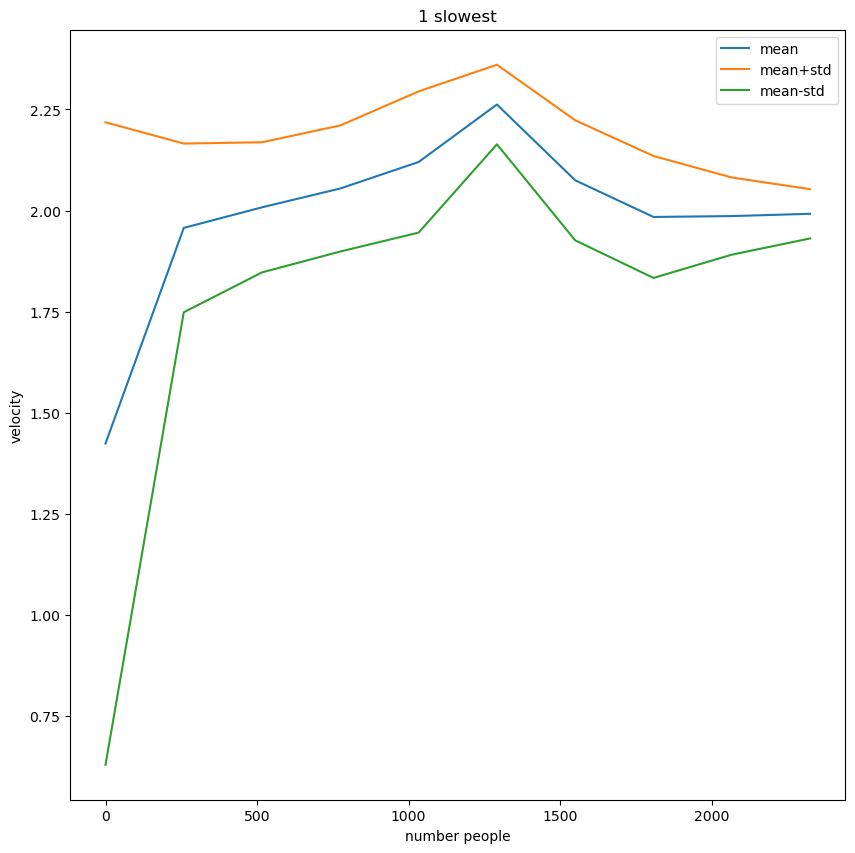

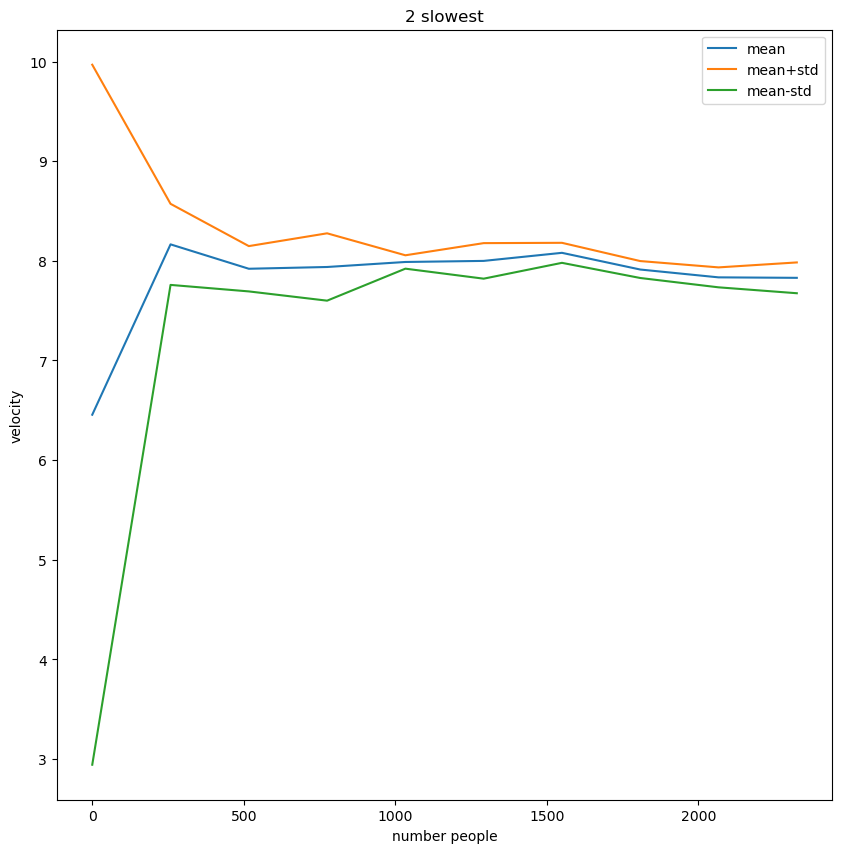

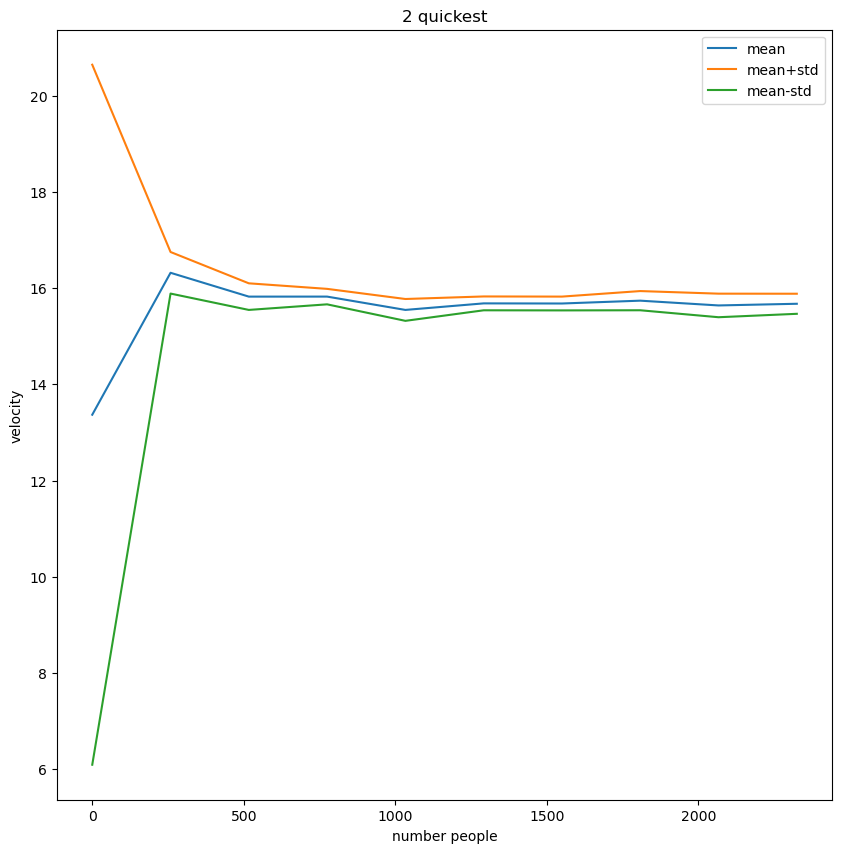

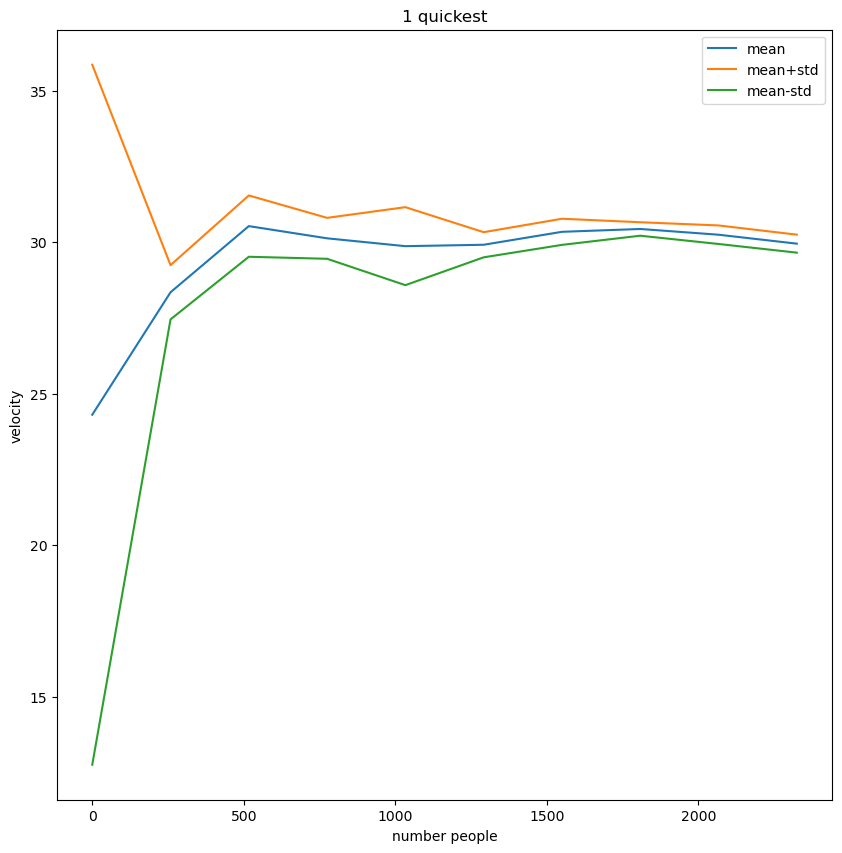

In [65]:
import warnings
warnings.filterwarnings('ignore') 
# EXTRACT VELOCITY AND DENDISTY FOR FUNDAMENTAL DIAGRAMS
def append_adding_0_to_list(list_to_enlarge,list_to_append):
    '''
    Crea la matrice [giorno,ora] per la densità e la velocità
    '''
    dim = 96
    if len(list_to_enlarge)==0:
        list_to_enlarge = np.append(np.zeros(dim-len(list_to_append)),np.array(list_to_append))     
        list_to_enlarge = np.reshape(list_to_enlarge,(dim,1))   
        pass
    else:
        list_to_append = np.append(np.zeros(dim-len(list_to_append)),np.array(list_to_append))
        list_to_append = np.reshape(list_to_append,(dim,1))   
        list_to_enlarge = np.append(np.array(list_to_enlarge),list_to_append,axis = 1)
    return list(list_to_enlarge)    
dict_fundamental_diagrams = defaultdict()

for i in range(len(stats)):
    dict_fundamental_diagrams[StrDates[i]] = defaultdict() # {day:}
    for idx in list_dict_name[i].keys():
        if idx!=10 and i<len(stats) - 1:
            word = list_dict_name[i][idx].split(' ')[0] + '_' + list_dict_name[i][idx].split(' ')[1]
            df = pd.read_csv(os.path.join(s_dir[i],'class_{}_for_fondamental_diagram.csv'.format(list_dict_name[i][idx])),';').dropna()
            dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]] = defaultdict() # {day: 1 quickest: ,..}
            dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]]['velocity'] = list(df['velocity'].to_numpy())
            dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]]['number users'] = list(df['population'].to_numpy())           
            dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]]['average velocity'] = np.mean(dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]]['velocity'])
            dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]]['variance velocity'] = np.std(dict_fundamental_diagrams[StrDates[i]][list_dict_name[i][idx]]['velocity'])

# EVALUATE DAY TO CONSIDER (Output is a dictionary with key = day and value = list of days with similar velocity)
dict_similar_velocity = defaultdict()
for key_day in dict_fundamental_diagrams.keys():
    dict_similar_velocity[key_day] = defaultdict(list)
    for key_day1 in dict_fundamental_diagrams.keys():
        if key_day != '2023-03-18' and key_day1 != '2023-03-18' and key_day!=key_day1:
            for key_class in dict_fundamental_diagrams[key_day].keys():
                if dict_fundamental_diagrams[key_day][key_class]['average velocity'] - dict_fundamental_diagrams[key_day][key_class]['variance velocity']< dict_fundamental_diagrams[key_day1][key_class]['average velocity'] +  dict_fundamental_diagrams[key_day1][key_class]['variance velocity'] and dict_fundamental_diagrams[key_day][key_class]['average velocity'] + dict_fundamental_diagrams[key_day][key_class]['variance velocity'] > dict_fundamental_diagrams[key_day1][key_class]['average velocity'] - dict_fundamental_diagrams[key_day1][key_class]['variance velocity']:
                    dict_similar_velocity[key_day][key_class].append(key_day)
#                print(key_day,key_day1,key_class)
#                print(dict_fundamental_diagrams[key_day][key_class]['average velocity'] - dict_fundamental_diagrams[key_day][key_class]['variance velocity'])
#                print(dict_fundamental_diagrams[key_day][key_class]['average velocity'] + dict_fundamental_diagrams[key_day][key_class]['variance velocity'])
#                print(dict_fundamental_diagrams[key_day1][key_class]['average velocity'] -  dict_fundamental_diagrams[key_day1][key_class]['variance velocity'])
#                print(dict_fundamental_diagrams[key_day1][key_class]['average velocity'] +  dict_fundamental_diagrams[key_day1][key_class]['variance velocity'])
            
# COMPUTE DAY 2 to CONSIDER 
day2consider = defaultdict()
for key_day in dict_similar_velocity.keys():
    day2consider[key_day] = defaultdict(list)
    for key_day1 in dict_similar_velocity.keys():
        for key_class in dict_similar_velocity[key_day].keys():
            if key_day1 in dict_similar_velocity[key_day][key_class] and key_day!=key_day1:
                day2consider[key_day][key_day1].append(True)
            else:
                day2consider[key_day][key_day1].append(False)     
for key_day in dict_similar_velocity.keys():
    for key_day1 in dict_similar_velocity.keys():
        if key_day != '2023-03-18' and key_day1 != '2023-03-18':
            if False in day2consider[key_day][key_day1]:
                day2consider[key_day][key_day1] = False
            else:
                day2consider[key_day][key_day1] = True
#        print(key_day,key_day1,day2consider[key_day][key_day1])
# COMPUTE av_velocity,av_density shape (96,1)
day2density = defaultdict()
day2velocity = defaultdict()
#for key_day in day2consider.keys():
key_day = list(day2consider.keys())[0]  
for cl in dict_fundamental_diagrams[key_day].keys():
    c = 0
    if key_day != '2023-03-18' and key_day in ['2022-12-30','2022-12-31','2023-01-01','2022-11-11','2022-01-31'] and c==0: #['2022-12-30','2022-12-31','2023-01-01','2022-05-12','2022-11-11','2022-07-01','2022-08-05','2022-01-31',"2023-03-18"]            
        density = append_adding_0_to_list([],list(dict_fundamental_diagrams[key_day][cl]['number users']))
#            density = list(dict_fundamental_diagrams[key_day][cl]['number users'])
        velocity = append_adding_0_to_list([],list(dict_fundamental_diagrams[key_day][cl]['velocity']))
    for key_day1 in day2consider[key_day].keys():
        if key_day !=key_day1 and key_day != '2023-03-18' and key_day1 != '2023-03-18' and key_day in ['2022-12-30','2022-12-31','2023-01-01','2022-11-11','2022-01-31'] and  key_day1 in ['2022-12-30','2022-12-31','2023-01-01','2022-11-11','2022-01-31']:            
            c+=1
#                if day2consider[key_day][key_day1] == True:
            density = append_adding_0_to_list(density,list(dict_fundamental_diagrams[key_day][cl]['number users']))
            velocity = append_adding_0_to_list(velocity,list(dict_fundamental_diagrams[key_day][cl]['velocity']))
    density = np.asmatrix(density) # [#day,#density_time]
    velocity = np.asmatrix(velocity) # [#day,#density_time] # density_time = 96 (each 1/4 hour)
    av_density = density.mean(axis = 1) 
    av_velocity = velocity.mean(axis = 1)
    av_density = np.asarray(av_density).flatten()
    av_velocity = np.asarray(av_velocity).flatten()    
    day2density[cl] = av_density
    day2velocity[cl] = av_velocity
for cl in day2density.keys():
    x = day2density[cl]
    y = day2velocity[cl]
    nx,binsx = np.histogram(x,range = (min(x),max(x)))
    ny,binsy = np.histogram(y,range = (min(y),max(y)))
    y_avg = np.zeros(len(binsx))
    y_dev = np.zeros(len(binsx))
    for dx in range(len(binsx)-1):
        idx_ = np.array([True if xi>=binsx[dx] and xi<=binsx[dx+1] else False  for xi in x])
        y_avg[dx] += np.mean(y[idx_])
        y_dev[dx] = np.std(y[idx_])
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    plt.plot(binsx[:-1],y_avg[:-1])
    plt.plot(binsx[:-1],y_avg[:-1]+y_dev[:-1])
    plt.plot(binsx[:-1],y_avg[:-1]-y_dev[:-1])
    plt.xlabel('number people')
    plt.ylabel('velocity')
    plt.title(cl)
    plt.legend(['mean','mean+std','mean-std'])
    plt.savefig(os.path.join('/home/aamad/codice/city-pro/output/bologna_mdt_detailed/all','averaged_MFD_class_{}.png'.format(cl)),dpi = 200)
    plt.show()

In [63]:
# 2 RUN
for i in range(len(fcm)):    
    total_users = len(fcm[i])
    print('day: ',StrDates[i],'\tnumber of people: ',total_users)
    for f,fc in fcm[i].groupby('class'):
        users_f = len(fcm[i].groupby('class').get_group(f))
        av_speed = np.mean(fcm[i].groupby('class').get_group(f)['av_speed'].to_numpy())
        if f!=10:
            print('class ',list_dict_name[i][f],' relative numerosity:\t',users_f/total_users, ' total numerosity class:\t',users_f,"average_velocity:\t",av_speed)
        else:
            print('unclussified class:\t',users_f/total_users, ' total numerosity:\t',users_f)

day:  2022-12-30 	number of people:  68694
class  {}  relative numerosity:	 0.002620316184819635  total numerosity class:	 180 average_velocity:	 85.85873777777778
class  2 quickest  relative numerosity:	 0.333245989460506  total numerosity class:	 22892 average_velocity:	 15.784380702428797
class  1 slowest  relative numerosity:	 0.23304801001543074  total numerosity class:	 16009 average_velocity:	 2.0498159105503158
class  1 quickest  relative numerosity:	 0.13087023611960288  total numerosity class:	 8990 average_velocity:	 30.274453047830928
class  2 slowest  relative numerosity:	 0.24785279645966168  total numerosity class:	 17026 average_velocity:	 7.994892428638551
unclussified class:	 0.052362651759979034  total numerosity:	 3597
day:  2022-12-31 	number of people:  57138
class  1 slowest  relative numerosity:	 0.2558542476110469  total numerosity class:	 14619 average_velocity:	 1.6713124246460087
class  1 quickest  relative numerosity:	 0.10327627848367112  total numerosity 

In [23]:
mask = [True if x>50 else False for x in fcm[0]['av_speed'].to_numpy()]
ids_ = fcm[0].loc[mask]['id_act'].to_numpy()
stats[0].loc[stats[0]['id_act'].isin(ids_)]

,id_act,lenght,time,av_speed,ndat,front_lat,front_lon,tail_lat,tail_lon,start_time,end_time
1247,3230677323,69630.8,1705,50.7406,56,44.5544,10.8168,44.7304,11.5142,1672389215,1672390920
1296,3231007163,40977.6,1348,52.7498,6,44.1662,11.1968,44.5067,11.2030,1672417583,1672418931
1420,3231993378,13230.9,6643,79.3166,14,44.5940,11.3779,44.6282,11.4936,1672385656,1672392299
1609,3233386065,22552.1,788,67.0228,6,44.4785,11.2649,44.2840,11.2007,1672417347,1672418137
2102,3237515603,37666.7,1044,52.9203,20,44.2901,11.2098,44.5437,11.0991,1672413811,1672414855
...,...,...,...,...,...,...,...,...,...,...,...
67182,4277669606,33908.1,1004,83.4157,8,44.6409,10.8783,44.4889,11.2465,1672397365,1672406667
67468,4280369507,38803.5,1501,63.6249,10,44.1509,11.1941,44.4885,11.2529,1672412890,1672414391
67863,4284299760,18101.7,482,87.0758,8,44.4626,11.2718,44.5313,11.1325,1672390811,1672391293
67898,4284514784,22008.1,3640,80.2734,25,44.5014,11.1653,44.4828,11.3760,1672424442,1672428100


all different groups colored differently
8000


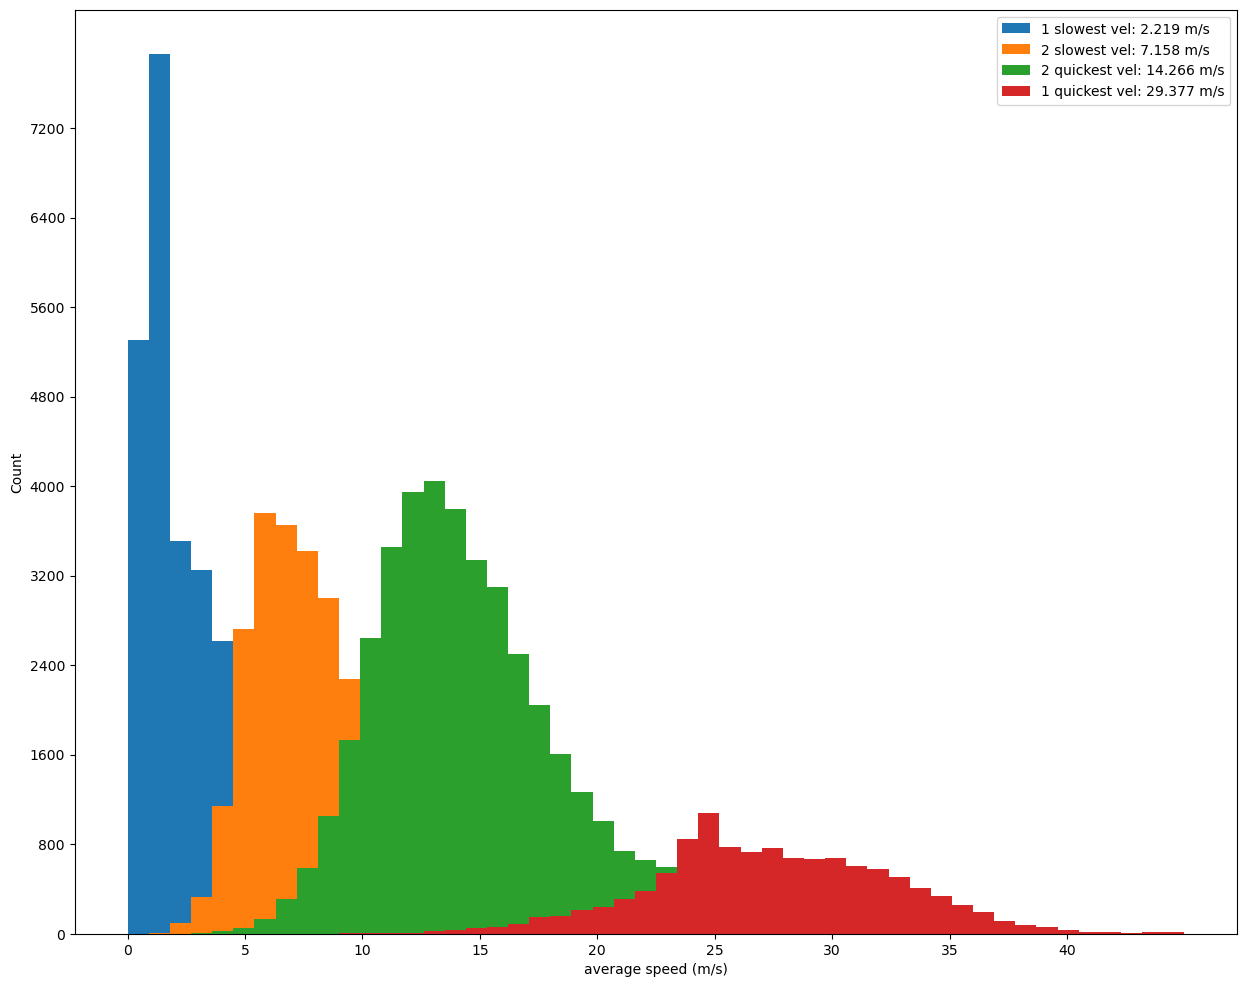

all different groups same color
8000


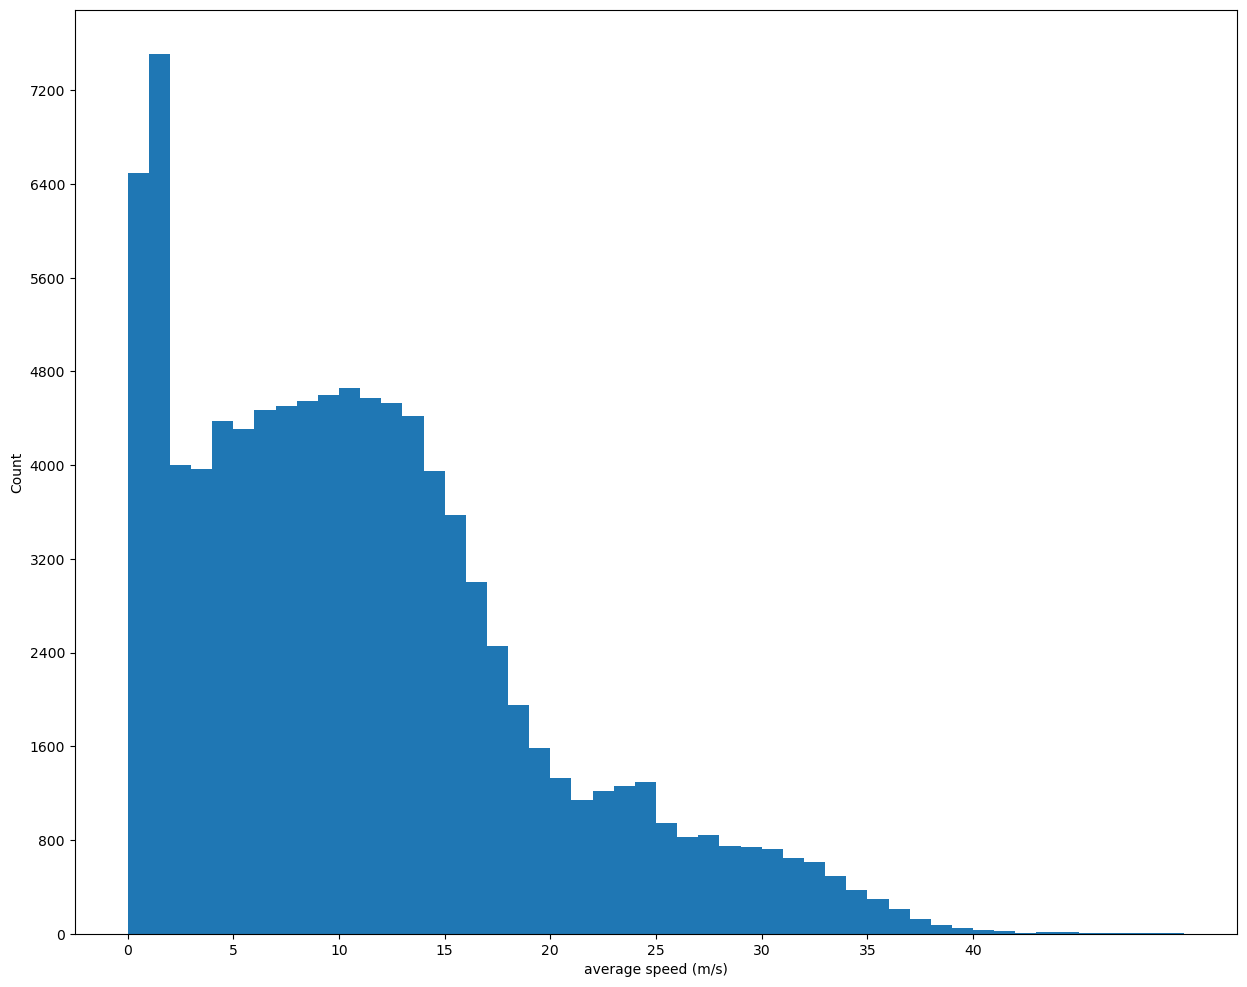

covariance matrix a,b:
 [[ 0.00367897 -0.00347577]
 [-0.00347577  0.00546874]]
a_maxwell,b_maxwell:
 1.0286781001060947 -0.5586136074441698


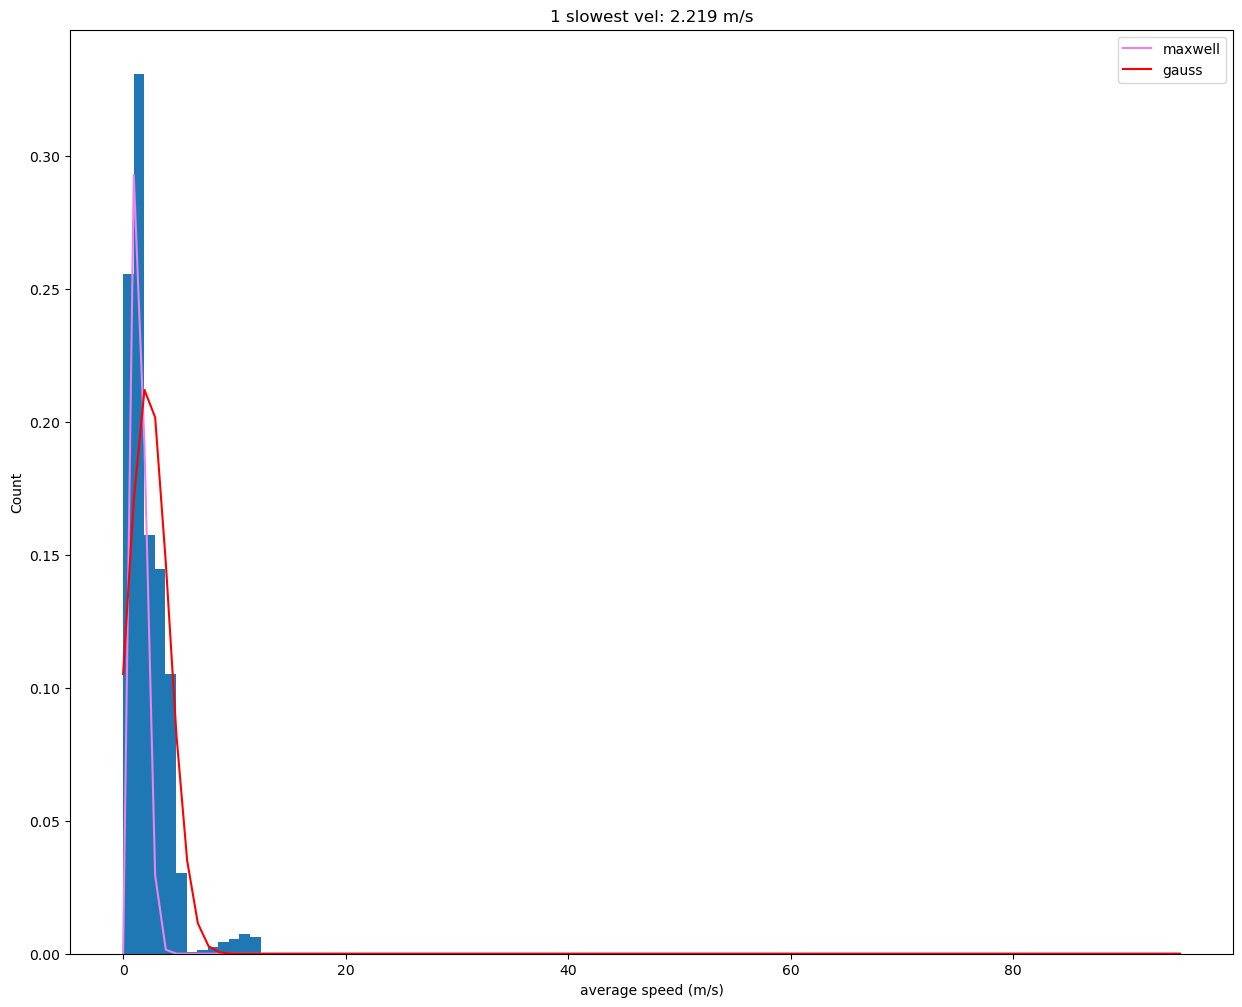

covariance matrix a,b:
 [[ 0.02665576 -0.0353914 ]
 [-0.0353914   0.0566174 ]]
a_maxwell,b_maxwell:
 5.6761625579229 -5.529547253852153


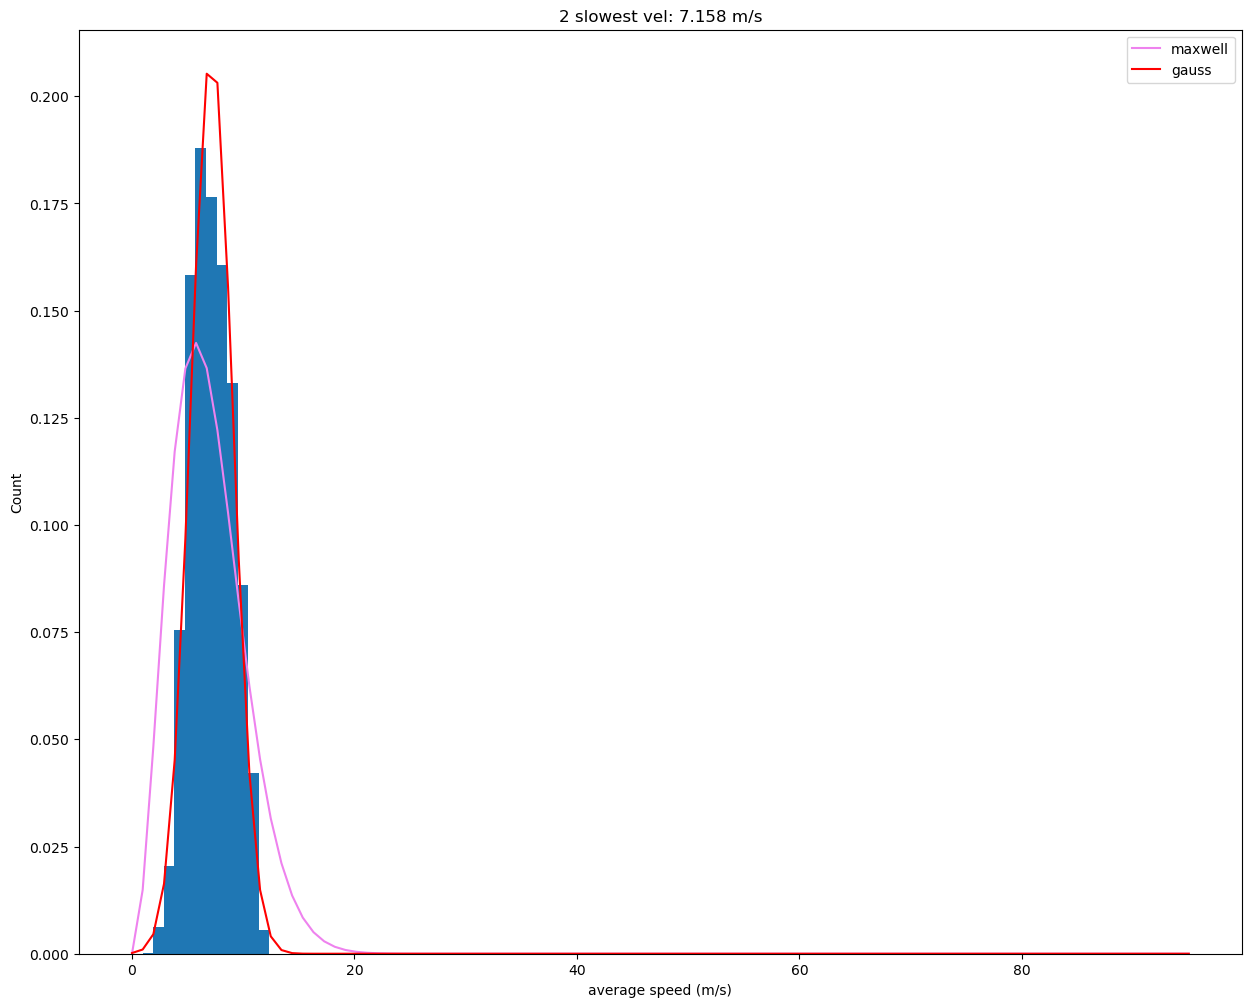

covariance matrix a,b:
 [[ 0.25574827 -0.41341653]
 [-0.41341653  0.74100418]]
a_maxwell,b_maxwell:
 12.82104007459841 -16.876988342254872


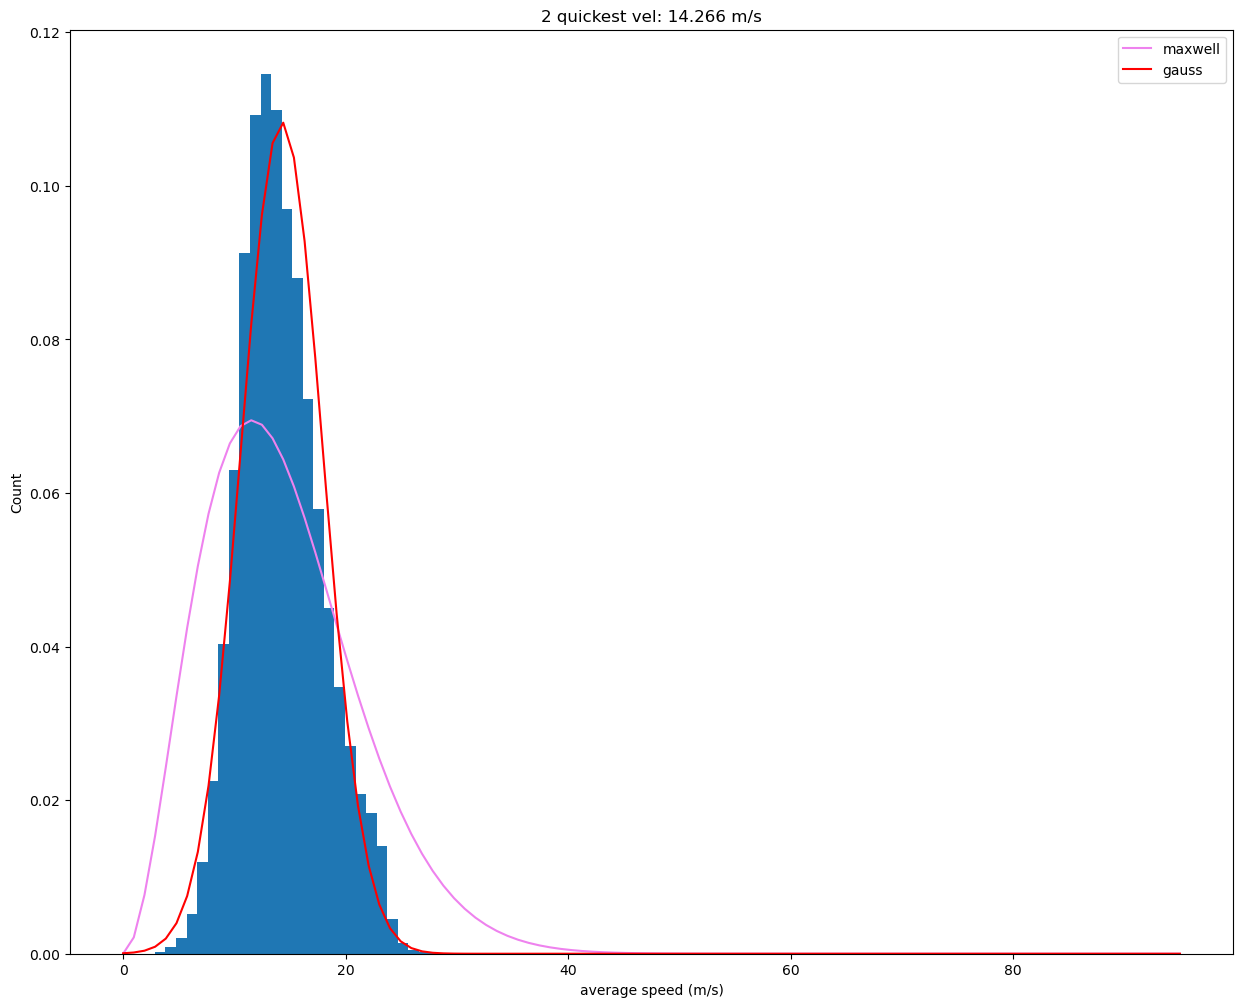

covariance matrix a,b:
 [[ 3.15690342 -5.89712166]
 [-5.89712166 11.75643435]]
a_maxwell,b_maxwell:
 27.648206489057955 -44.34051464940667


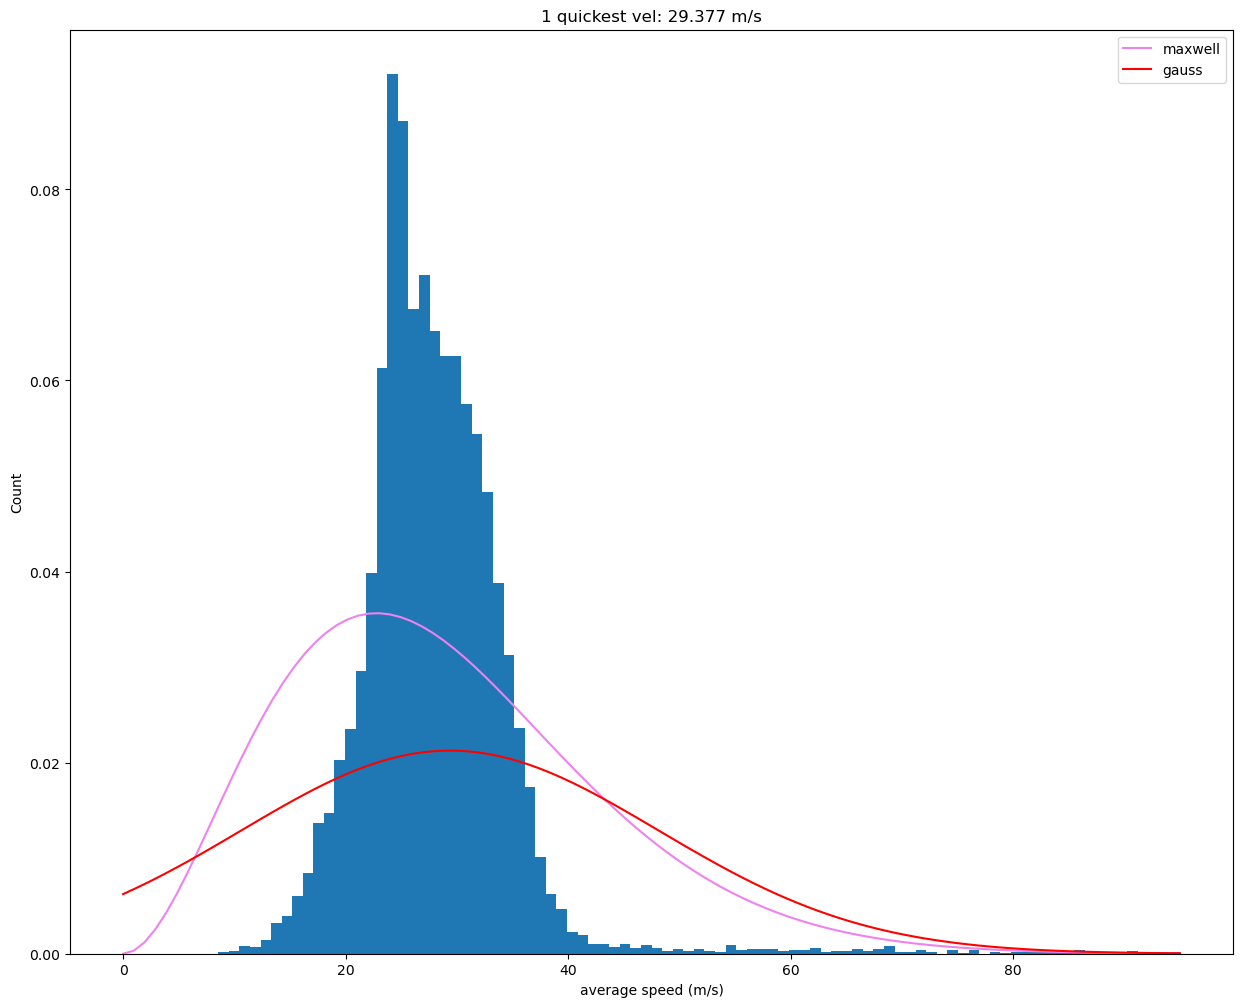

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import maxwell,norm
from scipy.optimize import curve_fit

def maxwellian(x,sigma,mu):
    return (x/sigma)**2 * np.exp(-(x - mu)**2 / (2 * sigma**2))
def gaussian(x,sigma,mu):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
    
def get_best_binning_distribution_velocity_plot(fcm_data,list_dict_name,i,aggregation):
    max_ys = []
    if aggregation:
        aggregated = []
        for cl,df in fcm_data.groupby('class'):
        #    fig,ax = plt.subplots(1,1,figsize= (15,12))
            if cl!=10 and len(list_dict_name[i][cl])!=0:
                aggregated.extend(df['av_speed'].to_numpy())
                n,bins =np.histogram(df['av_speed'].to_numpy(),bins = 50,range = [0,45])
                max_ys.append(max(n))
    else:
        for cl,df in fcm_data.groupby('class'):
        #    fig,ax = plt.subplots(1,1,figsize= (15,12))
            if cl!=10 and len(list_dict_name[i][cl])!=0:
                n,bins =np.histogram(df['av_speed'].to_numpy(),bins = 50,range = [0,45])
                max_ys.append(max(n))
    for i in range(1000):
        if (max(max_ys)+i)%1000==0:
            max_ = max(max_ys)+i
            break
    print(max_)
    y = np.arange(0,max_,max_/10) 
    x = np.arange(9)*5
    return x,y    
def plot_distribution_velocity_all_class_together_per_day(fcm_data,list_dict_name,i):
    print('all different groups colored differently')
    fig,ax = plt.subplots(1,1,figsize= (15,12))
    legend = []
    aggregation = False
    for cl,df in fcm_data.groupby('class'):
    #    fig,ax = plt.subplots(1,1,figsize= (15,12))
        if cl!=10 and len(list_dict_name[i][cl])!=0:
            plt.hist(df['av_speed'].to_numpy(),bins = 50,range = [0,45])
            av_speed = np.mean(df['av_speed'].to_numpy())
            legend.append(list_dict_name[i][cl] + ' vel: ' + str(round(av_speed,3)) +' m/s')
    x,y = get_best_binning_distribution_velocity_plot(fcm_data,list_dict_name,i,aggregation)
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_xlabel('average speed (m/s)')
    ax.set_ylabel('Count')
    legend_ = plt.legend(legend)
    frame = legend_.get_frame()
    frame.set_facecolor('white')
    plt.savefig(os.path.join(s_dir[i],'average_speed_4_classes_1.png'),dpi = 200)
    plt.show()

def plot_aggregated_velocity(fcm_data,list_dict_name,i):
    print('all different groups same color')
    fig,ax = plt.subplots(1,1,figsize= (15,12))
    legend = []
    aggregated = []
    aggregation = True
    for cl,df in fcm_data.groupby('class'):
    #    fig,ax = plt.subplots(1,1,figsize= (15,12))
        if cl!=10 and len(list_dict_name[i][cl])!=0:
            aggregated.extend(df['av_speed'].to_numpy())
    plt.hist(aggregated,bins = 50,range = [0,50])
    x,y = get_best_binning_distribution_velocity_plot(fcm_data,list_dict_name,i,aggregation)
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_xlabel('average speed (m/s)')
    ax.set_ylabel('Count')
    plt.savefig(os.path.join(s_dir[i],'av_speed_aggregated.png'),dpi = 200)
    plt.show()

resolution = 100
n_bins_std = 100
bin_width = 5
rescaling_factor_pdf = resolution/n_bins_std
i=0
for fcm_data in fcm:
    plot_distribution_velocity_all_class_together_per_day(fcm_data,list_dict_name,i)
    plot_aggregated_velocity(fcm_data,list_dict_name,i)
    for cl,df in fcm_data.groupby('class'):
        if cl!=10 and len(list_dict_name[i][cl])!=0:
            n,bins = np.histogram(df['av_speed'].to_numpy(),bins = n_bins_std,range = [0,n_bins_std-bin_width])            
            scaling_factor_data = np.sum(n)
            initial_guess_sigma = np.std(df['av_speed'].to_numpy())
            initial_guess_mu = np.mean(df['av_speed'].to_numpy())
            params, pcov = curve_fit(maxwellian,xdata = bins[:-1],ydata = np.array(n)/scaling_factor_data, p0=[initial_guess_sigma, initial_guess_mu])
            a_maxwell,b_maxwell = params
            print("covariance matrix a,b:\n",pcov)
            print("a_maxwell,b_maxwell:\n",a_maxwell,b_maxwell)
#            a_maxwell,b_maxwell = maxwell.fit(df['av_speed'].to_numpy(),floc = np.mean(df['av_speed']))
            a_gauss,b_gauss = norm.fit(df['av_speed'].to_numpy(),floc = np.mean(df['av_speed']))
            fig,ax = plt.subplots(1,1,figsize= (15,12))
            plt.hist(df['av_speed'].to_numpy(),bins = n_bins_std,range = [0,n_bins_std-bin_width],density = True)
            av_speed = np.mean(df['av_speed'].to_numpy())       
            ax.set_xlabel('average speed (m/s)')
            ax.set_ylabel('Count')
            ax.set_title(list_dict_name[i][cl] + ' vel: ' + str(round(av_speed,3)) +' m/s')
#            print('maxwell pdf:\n ',maxwellian(np.linspace(min(bins),max(bins),resolution),a_maxwell,b_maxwell))
#            print('gaussian pdf rescaled:\n ',norm.pdf(np.linspace(min(bins),max(bins),resolution),a_gauss,b_gauss))
            plt.plot(np.linspace(min(bins),max(bins),resolution),maxwellian(np.linspace(min(bins),max(bins),resolution),a_maxwell,b_maxwell),label = 'maxwell',color = 'violet')
            plt.plot(np.linspace(min(bins),max(bins),resolution),norm.pdf(np.linspace(min(bins),max(bins),resolution),a_gauss,b_gauss),label = 'gauss',color = 'red')
            plt.legend(['maxwell','gauss'])
            plt.savefig(os.path.join(s_dir[i],'average_speed_{}.png'.format(list_dict_name[i][cl])),dpi = 200)
            plt.show()
    i+=1
    


# DISTRIBUTION TIME AND LENGTH PER CLASS

# This cell contains some useful functions for plotting even though the fitting procedure is done below.

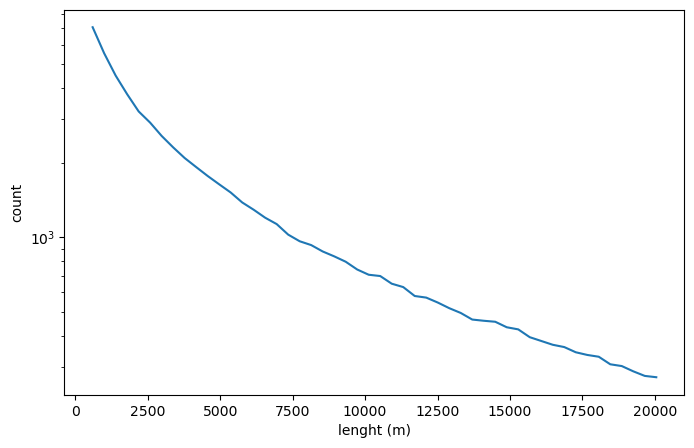

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import powerlaw
import warnings
import scipy.stats 
warnings.filterwarnings("ignore")


def fit_class_run_xmin_xmax(stats_data,save_dir,case,cl,key,dict_name):
    statfit = {}
    print('fitting class',dict_name[cl])
    if key == 'time' and len(dict_name[cl]) !=0:
        print('time')
        x_min = list(np.linspace(10,100,1))
        if dict_name[cl] == '1 slowest':
            x_max = list(np.linspace(6000,10000,20))
        elif dict_name[cl] == '2 slowest':
            x_max = list(np.linspace(6000,10000,20))
        elif dict_name[cl] == '2 quickest':
            x_max = list(np.linspace(6000,10000,20))
        elif dict_name[cl] == '1 quickest':
            x_max = list(np.linspace(60000,10000,20))
        for xi in x_min:
            statfit[xi] = {}
            for xj in x_max:
                print('xmin: ',xi,'\txmax: ',xj)
                statfit[xi][xj] = {}
                fit = powerlaw.Fit(stats_data[key],xmin = xi, xmax = xj)
                R,p = fit.distribution_compare('power_law', 'exponential')
                if R>0 and not (np.isnan(R) or np.isnan(p)):
                    print('R: ',R,'\tp: ',p)
                    print('alpha: ',fit.power_law.alpha,'\tsigma: ',fit.power_law.sigma)
                    #print('more probable that the fit is a power law rather then expo')
                    statfit[xi][xj]['alpha'] = fit.power_law.alpha
                    statfit[xi][xj]['sigma'] = fit.power_law.sigma
                    statfit[xi][xj]['power_law'] = True
                    statfit[xi][xj]['R'] = R
                    statfit[xi][xj]['p'] = p

    elif key == 'lenght' and len(dict_name[cl]) !=0:
        print('lenght')
        if dict_name[cl] == '1 slowest':
            x_min = list(np.linspace(10,500,20))
        elif dict_name[cl] == '2 slowest':
            x_min = list(np.linspace(500,5000,30))
        elif dict_name[cl] == '2 quickest':
            x_min = list(np.linspace(2000,9000,30))
        elif dict_name[cl] == '1 quickest':
            x_min = list(np.linspace(1000,25000,1))
        
        if dict_name[cl] == '1 slowest':
            x_max = list(np.linspace(8000,13000,30))
        elif dict_name[cl] == '2 slowest':
            x_max = list(np.linspace(12000,18000,30))
        elif dict_name[cl] == '2 quickest':
            x_max = list(np.linspace(14000,20000,30))
        elif dict_name[cl] == '1 quickest':
            x_max = list(np.linspace(1000,25000,1))
        for xi in x_min:
            statfit[xi] = {}
            for xj in x_max:
                print('xmin: ',xi,'\txmax: ',xj)
                statfit[xi][xj] = {}
                fit = powerlaw.Fit(stats_data[key],xmin = xi, xmax = xj)
                R,p = fit.distribution_compare('power_law', 'exponential')
                if R>0 and not (np.isnan(R) or np.isnan(p)):
                    print('R: ',R,'\tp: ',p)
                    print('alpha: ',fit.power_law.alpha,'\tsigma: ',fit.power_law.sigma)
                    #print('more probable that the fit is a power law rather then expo')
                    statfit[xi][xj]['alpha'] = fit.power_law.alpha
                    statfit[xi][xj]['sigma'] = fit.power_law.sigma
                    statfit[xi][xj]['power_law'] = True
                    statfit[xi][xj]['R'] = R
                    statfit[xi][xj]['p'] = p
    if len(dict_name[cl]) !=0:
        with open(os.path.join(save_dir,'fit_{0}_{1}_{2}.json'.format(case,key,dict_name[cl])),'w') as f:
            json.dump(statfit,f,indent = 2)
        f.close()
def heatmap(x,y,z,title):
    fig,ax = plt.subplots(1,1,figsize = (10,10))
    z = np.array(z).reshape(len(x),len(y))    
    plt.imshow(z, cmap='hot', interpolation='nearest')
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_title(title)
    plt.colorbar()
    plt.show()
    
def fit_class_choose_xmin_xmax(save_dir,case,cl,key,dict_name):
    if len(dict_name[cl])!=0:
        with open(os.path.join(save_dir,'fit_{0}_{1}_{2}.json'.format(case,key,dict_name[cl])),'r') as f:
            statfit = json.load(f)
        x_mins = []
        x_maxs = []
        x_min_to_choose = []
        x_max_to_choose = []
        ps = []
        Rs = []
        sigmas = []
        alphas = []
        power_law_bool = []
        for xi in statfit.keys():
            for xj in statfit[xi].keys():
                if len(statfit[xi][xj].keys())!=0:
                    if float(xi) not in x_mins:
                        x_mins.append(float(xi))
                    if float(xj) not in x_maxs:
                        x_maxs.append(float(xj))
                    x_min_to_choose.append(float(xi))
                    x_max_to_choose.append(float(xj))
                    ps.append(float(statfit[xi][xj]['p']))
                    Rs.append(float(statfit[xi][xj]['R']))
                    sigmas.append(float(statfit[xi][xj]['sigma']))
                    alphas.append(float(statfit[xi][xj]['alpha']))
                    power_law_bool.append(float(statfit[xi][xj]['power_law']))
        if len(alphas)!=0 and len(sigmas)!=0 and len(ps)!=0:
            print('min p value: ',min(ps)," alpha: ",alphas[ps.index(min(ps))]," sigma: ",sigmas[ps.index(min(ps))])
            alpha = alphas[ps.index(min(ps))]
            sigma = sigmas[ps.index(min(ps))]
            x_min = x_min_to_choose[ps.index(min(ps))]
            x_max = x_max_to_choose[ps.index(min(ps))]
            power_law_ = power_law_bool[ps.index(min(ps))]
        #    fig, ax = plt.subplots()
            y,x = np.meshgrid(x_mins,x_maxs)
            heatmap(x_mins,x_maxs,ps,'significance value')
            #c = ax.pcolormesh(x, y, ps, cmap='RdBu', vmin=min(ps), vmax=max(ps))
            #ax.set_title('significance value')
            #ax.axis([x.min(), x.max(), y.min(), y.max()])
            #fig.colorbar(c, ax=ax)
            plt.show()

            fig, ax = plt.subplots()
            y,x = np.meshgrid(x_mins,x_maxs)
            #c = ax.pcolormesh(list(x), list(y), ps, cmap='RdBu', vmin=min(ps), vmax=max(ps))
            #ax.set_xlabel('x_min')
            #ax.set_ylabel('x_max')    
            heatmap(x_mins,x_maxs,Rs,'log likelihood')
            #ax.set_title('log likelihood')
            #ax.axis([x.min(), x.max(), y.min(), y.max()])
            #fig.colorbar(c, ax=ax)
            plt.show()
            return alpha,sigma,x_min,x_max,power_law_
        else:
            return np.nan,np.nan,np.nan,np.nan,np.nan
def plot_distr(stats_data,save_dir,case,cl,key,unit,dict_name,sigma,alpha,x_min,x_max,power_law_):
    '''
    Case distance:
        w = 60
        max_ = 5000
    Case time:
        w = 12
        max_ = 1000
    '''
    if np.isnan(sigma) or np.isnan(alpha) or np.isnan(x_min) or np.isnan(x_max) or np.isnan(power_law_):
        legend_plot = []
        _,ax = plt.subplots(1,1,figsize = (8,5))
        n,bins = np.histogram(stats_data[key],bins = 'auto',range = (x_min, x_max + 50),density = False)
        plt.plot(bins[1:],n)
        if power_law_ and len(dict_name[cl])!=0:
            plt.title('class: '+dict_name[cl])
            bw = (x_max-x_min)/len(n)
            f_bins = np.linspace(x_min, x_max + int(bw), int(bw))**(alpha) 
            plt.plot(bins[1:],f_bins,linestile = '--')
            plt.xlabel('{0} ({1})'.format(key,unit))
            plt.ylabel('count')
            ax.set_xscale('linear')
            ax.set_yscale('log')    
            plt.ax_set_title('x_min: {0} x_max: {1}'.format(x_min,x_max))
            legend_plot.append(r'$\alpha $ = {0} $\pm {1}$'.format(round(alpha,3),round(sigma,3)))
            legend = plt.legend(legend_plot)
            frame = legend.get_frame()
            frame.set_facecolor('white')
            plt.savefig(os.path.join(save_dir,'{0}_distribution_{1}_{2}'.format(key,case,dict_name[cl])),dpi = 200)
            plt.show()
        elif len(dict_name[cl])!=0:
            from scipy.optimize import curve_fit
            plt.title('class: '+dict_name[cl])
            popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, bins[1:], n)
            a = popt[0]
            b = popt[1]
            c = popt[2]
            x_fitted = np.linspace(np.min(bins[1:]), np.max(bins[1:]), 100)
            y_fitted = a * np.exp(b * x_fitted) + c        
            ax.plot(x_fitted, y_fitted, 'k', label='{0} exp ({1}x)+{2}'.format(round(a,3),round(b,3),round(c,3)))
            plt.ylabel('count')
            ax.set_xscale('linear')
            ax.set_yscale('log')    
            plt.savefig(os.path.join(save_dir,'{0}_distribution_{1}_{2}'.format(key,case,dict_name[cl])),dpi = 200)
            plt.show()
def plot_distr_without_fit(stats_data,save_dir,case,cl,key,unit,dict_name):
    if key=='time':
        x_min = 0
        x_max = 10000
    else:
        x_min = 200
        x_max = 20000
    
    legend_plot = []
    _,ax = plt.subplots(1,1,figsize = (8,5))
    n,bins = np.histogram(stats_data[key],bins= 'auto',range = (x_min, x_max + 50) ,density = False)
    plt.plot(bins[1:],n)
    plt.title('class: '+dict_name[cl])
    plt.xlabel('{0} ({1})'.format(key,unit))
    plt.ylabel('count')
    ax.set_xscale('linear')
    ax.set_yscale('log')    
    plt.savefig(os.path.join(save_dir,'{0}_distribution_{1}_{2}_without_fit'.format(key,case,dict_name[cl])),dpi = 200)
    plt.show()
        
    #def plot_time_space_distribution_all_class(stats_data,save_dir,case,cl,dict_name):
    #    plot_distr(stats_data,save_dir,case,cl,60,'lenght',25000,'m',dict_name)
    #    plot_distr(stats_data,save_dir,case,cl,50,'time',8000,'s',dict_name)    
    #    return True
def plot_time_space_distribution_all_class(stats_data,save_dir,case,cl,key,dict_name,sigma,alpha,x_min,x_max,power_law_):
    if key == 'time':
        unit = 's'
        plot_distr(stats_data,save_dir,case,cl,key,unit,dict_name,sigma,alpha,x_min,x_max,power_law_)
    elif key == 'lenght':
        unit = 'm'
        plot_distr(stats_data,save_dir,case,cl,key,unit,dict_name,sigma,alpha,x_min,x_max,power_law_)
def fit_run_xmin_xmax(stats_data,save_dir,case,key):
    statfit = {}
    if key == 'time':
        print('time')
        x_min = list(np.linspace(50,500,50))
        x_max = list(np.linspace(60000,10000,20))
        for xi in x_min:
            statfit[xi] = {}
            for xj in x_max:
                print('xmin: ',xi,'\txmax: ',xj)
                statfit[xi][xj] = {}
                fit = powerlaw.Fit(stats_data[key],xmin = xi, xmax = xj)
                R,p = fit.distribution_compare('power_law', 'exponential')
                if R>0 and not (np.isnan(R) or np.isnan(p)):
                    print('R: ',R,'\tp: ',p)
                    print('alpha: ',fit.power_law.alpha,'\tsigma: ',fit.power_law.sigma)
                    #print('more probable that the fit is a power law rather then expo')
                    statfit[xi][xj]['alpha'] = fit.power_law.alpha
                    statfit[xi][xj]['sigma'] = fit.power_law.sigma
                    statfit[xi][xj]['power_law'] = True
                    statfit[xi][xj]['R'] = R
                    statfit[xi][xj]['p'] = p
    elif key == 'lenght':
        print('lenght')
        x_min = list(np.linspace(500,9000,50))
        x_max = list(np.linspace(12000,20000,50))
        for xi in x_min:
            statfit[xi] = {}
            for xj in x_max:
                print('xmin: ',xi,'\txmax: ',xj)
                statfit[xi][xj] = {}
                fit = powerlaw.Fit(stats_data[key],xmin = xi, xmax = xj)
                R,p = fit.distribution_compare('power_law', 'exponential')
                if R>0 and not (np.isnan(R) or np.isnan(p)):
                    print('R: ',R,'\tp: ',p)
                    print('alpha: ',fit.power_law.alpha,'\tsigma: ',fit.power_law.sigma)
                    #print('more probable that the fit is a power law rather then expo')
                    statfit[xi][xj]['alpha'] = fit.power_law.alpha
                    statfit[xi][xj]['sigma'] = fit.power_law.sigma
                    statfit[xi][xj]['power_law'] = True
                    statfit[xi][xj]['R'] = R
                    statfit[xi][xj]['p'] = p
    with open(os.path.join(save_dir,'total_fit_{0}_{1}.json'.format(case,key)),'w') as f:
        json.dump(statfit,f,indent = 2)
    f.close()
def total_plot_distr_without_fit(stats_data,save_dir,case,key,unit):
    if key=='time':
        x_min = 0
        x_max = 10000
    else:
        x_min = 200
        x_max = 20000
    
    legend_plot = []
    _,ax = plt.subplots(1,1,figsize = (8,5))
    n,bins = np.histogram(stats_data[key],bins= 50,range = (x_min, x_max + 50) ,density = False)
    plt.plot(bins[1:],n)
    plt.title(key)
    plt.xlabel('{0} ({1})'.format(key,unit))
    plt.ylabel('count')
    ax.set_xscale('linear')
    ax.set_yscale('log')    
    plt.savefig(os.path.join(save_dir,'total_{0}_distribution_{1}_without_fit'.format(key,case)),dpi = 200)
    #plt.show()
    return n,bins


fit_classes = False
if fit_classes:
    for i in range(len(stats)):
        fcm_data = fcm[i]
        stats_data = stats[i]
        if not os.path.exists(os.path.join(s_dir[i],'fit')):
            os.mkdir(os.path.join(s_dir[i],'fit'))
        save_dir = os.path.join(s_dir[i],'fit')
        dict_ = list_dict_name[i]    
        for cl,dfc in fcm_data.groupby('class'):
            if cl != 10 and len(dict_[cl])!=0:
                mask_id = [True if x in dfc['id_act'].to_numpy() else False for x in stats_data['id_act'].to_numpy()]
                tmp = stats_data.loc[mask_id]
                for key in ['lenght']:#['time','lenght']:
                    if key=='time':
                        plot_distr_without_fit(tmp,save_dir,'Bologna_mdt_detailed',cl,key,'s',dict_)
                    else:
                        plot_distr_without_fit(tmp,save_dir,'Bologna_mdt_detailed',cl,key,'m',dict_)
    #                fit_class_run_xmin_xmax(tmp,save_dir,'Bologna_mdt_detailed',cl,key,dict_)
    #                alpha,sigma,x_min,x_max,power_law_ = fit_class_choose_xmin_xmax(save_dir,'Bologna_mdt_detailed',cl,key,dict_)
                    #plot_time_space_distribution_all_class(tmp,save_dir,'Bologna_mdt_detailed',cl,key,dict_,sigma,alpha,x_min,x_max,power_law_)

fit_global = True
if fit_global:
    density = {'lenght':[],'time':[]}
    all_data = {'lenght':[],'time':[]}
    for i in range(len(stats)):
        save_dir = os.path.join(s_dir[i],'fit')
        fcm_data = fcm[i]
        stats_data = stats[i]
        if not os.path.exists(os.path.join(s_dir[i],'fit')):
            os.mkdir(os.path.join(s_dir[i],'fit'))
        for key in ['lenght']:#['time','lenght']:
            if key == 'lenght':
                unit = 'm'
                n,bins = total_plot_distr_without_fit(stats_data,save_dir,'Bologna_mdt_detailed',key,unit)
                print(len(n))
                n = np.reshape(n,(len(n),1))
                if len(density[key])==0:
                    density[key] = n
                    all_data[key] = stats_data[key].to_numpy()
                else:
                    density[key] = np.append(density[key],n,axis = 1)
                    all_data[key] = np.append(all_data[key],stats_data[key].to_numpy())
            else:
                unit = 's'
                n,bins = total_plot_distr_without_fit(stats_data,save_dir,'Bologna_mdt_detailed',key,unit)
                n = np.reshape(n,(len(n),1))
                if len(density[key])==0:
                    density[key] = n
                    all_data[key] = stats_data[key].to_numpy()
                else:
                    density[key] = np.append(density[key],n,axis = 1)
                    all_data[key] = np.append(all_data[key],stats_data[key].to_numpy())

# FITTING AGGREGATED (OVER ALL DAYS)
for key in ['lenght']:#['time','lenght']:
    if key == 'lenght': 
        x_min = list(np.linspace(50,500,2))
        x_max = list(np.linspace(6000,20000,2))
#            print('xmin: ',xi,'\txmax: ',xj)
#            fit = powerlaw.Fit(all_data[key])#,xmin = xi, xmax = xj
#            R,p = fit.distribution_compare('power_law', 'exponential')
#            if R>0 and not (np.isnan(R) or np.isnan(p)):
#                print('R: ',R,'\tp: ',p)
#                print('alpha: ',fit.power_law.alpha,'\tsigma: ',fit.power_law.sigma)

    density[key] = np.asmatrix(density[key]) # [#day,#density_time]
    av_density = density[key].mean(axis = 1) 
    av_density = np.asarray(av_density).flatten() 
    fig,ax = plt.subplots(1,1,figsize = (8,5))
    plt.plot(bins[1:],av_density)
#        plt.plot(bins[1:],max(av_density)*bins[1:]**fit.power_law.alpha,linestyle = '--',color = 'red')
#        plt.title('aggregated days {0}x+ {1}'.format(round(fit.power_law.alpha,3),round(fit.power_law.sigma,3)))
    plt.xlabel('{0} ({1})'.format(key,unit))
    plt.ylabel('count')
    ax.set_xscale('linear')
    ax.set_yscale('log')    
    plt.savefig(os.path.join('/home/aamad/codice/city-pro/output/bologna_mdt_detailed/all','total_{0}_distribution_{1}'.format(key,'Bologna_mdt_detailed')),dpi = 200)
    plt.show()
            
    #            fit_run_xmin_xmax(stats_data,save_dir,'Bologna_mdt_detailed',key)
        

# FUNCTIONS PER FITTING DIFFERENT CLASSES AGGREGATED

In [5]:
def fill_dicts_binning_counts_per_class(list_dict_name,fcm,stats,key_dict):
    '''
    Input:
        -list_dict_name {0:{0: '1 slowest, ..., 3: '1 quickest},1:{0: '1 slowest, ..., 3: '1 quickest},2:{0: '2 quickest, ..., 3: '1 slowest'}}
            [] encodes the day we consider
            [][] encodes the class number (they are not the same for all the different names so far, it is something it needs to be changed on the cpp)
        - fcm = list of dataframes (one for each day)
        - stats = list of dataframes (one for each day)
        - key_dict = 'time' or 'lenght'
    Output: 
        density = dict {'1 slowest': [[cout00,...,count_0_n],[],...,[cout_nday_0,...,count_nday_n]],..., '1 quickest:  [[...]]}
        binning = dict {'1 slowest': [[bin00,...,bin_0_n],[],...,[bin_nday_0,...,bin_nday_n]],..., '1 quickest:  [[...]]}
    '''
    density = defaultdict(dict)
    binning = defaultdict(dict)
    for cl in list_dict_name[0].keys():
        if len(list_dict_name[0][cl])!=0:
            density[list_dict_name[0][cl]] = {key_dict:[]}
            binning[list_dict_name[0][cl]] = {key_dict:[]}
        for i in range(len(list_dict_name)):
            for cl1 in list_dict_name[0].keys():
                if list_dict_name[0][cl]==list_dict_name[i][cl1] and len(list_dict_name[0][cl])!=0:
                    users = fcm[i].groupby('class').get_group(cl1)['id_act']
                    stats_data = stats[i].loc[stats[i]['id_act'].isin(users)]
                    for key in density[list_dict_name[0][cl]].keys():
                        if len(density[list_dict_name[0][cl]][key])==0:
                            n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 20000 + 50),density = False)
                            n = np.reshape(n,(len(n),1))
                            bins = np.reshape(bins,(len(bins),1))
                            density[list_dict_name[0][cl]][key] = n
                            binning[list_dict_name[0][cl]][key] = bins
                        else:
                            n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 20000 + 50),density = False)
                            n = np.reshape(n,(len(n),1))
                            bins = np.reshape(bins,(len(bins),1))        
                            density[list_dict_name[0][cl]][key] = np.append(density[list_dict_name[0][cl]][key],n,axis = 1)
                            binning[list_dict_name[0][cl]][key] = np.append(binning[list_dict_name[0][cl]][key],bins,axis = 1)
    return density,binning

def average_binning_counts_per_class(list_dict_name,density,binning,key_dict):
    '''
        Input:

        Output:
            av_density = dict {'1 slowest': [cout_average0,...,count_average_n],..., '1 quickest:  [[...]]}
            av_bins = dict {'1 slowest': [bin_average0,...,bin_average_n],..., '1 quickest:  [[...]]}            
    '''
    av_density = defaultdict(dict)
    av_bins = defaultdict(dict)
    for cl in list_dict_name[0].keys():
        if len(list_dict_name[0][cl])!=0:
            av_density[list_dict_name[0][cl]] = {key_dict:[]}
            av_bins[list_dict_name[0][cl]] = {key_dict:[]}
    for cl in list_dict_name[0].keys():
        if len(list_dict_name[0][cl])!=0:    
            density[list_dict_name[0][cl]][key_dict] = np.asmatrix(density[list_dict_name[0][cl]][key_dict]) # [#day,#density_time]
            av_density[list_dict_name[0][cl]][key_dict] = density[list_dict_name[0][cl]][key_dict].mean(axis = 1) 
            av_density[list_dict_name[0][cl]][key_dict] = np.asarray(av_density[list_dict_name[0][cl]][key_dict]).flatten() 
            binning[list_dict_name[0][cl]][key_dict] = np.asmatrix(binning[list_dict_name[0][cl]][key_dict]) # [#day,#density_time]
            av_bins[list_dict_name[0][cl]][key_dict] = binning[list_dict_name[0][cl]][key_dict].mean(axis = 1) 
            av_bins[list_dict_name[0][cl]][key_dict] = np.asarray(av_bins[list_dict_name[0][cl]][key_dict]).flatten() 
    return av_density,av_bins


def get_best_exp_fit(amplitude_min,amplitude_max,characteristic_min,characteristic_max,av_bins,av_density):
    a_exp = np.linspace(amplitude_min,amplitude_max,1000)
    b_exp = np.linspace(characteristic_min,characteristic_max,1000) 
    error = []
    c_exp = 1000000
    for i in range(len(b_exp)):
        for j in range(len(a_exp)):
            res_exp = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))
            cost = np.sqrt(np.sum((av_density-res_exp[0][0]*np.exp(-av_bins/res_exp[0][1]))**2))/len(av_density)
            if not np.isnan(cost):
                error.append(cost)
            if c_exp>cost:
                res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))
                c_exp = cost
    avg = np.sum(np.array(av_density)*np.array(av_bins))/np.sum(np.array(av_density))
    var = np.sqrt(np.sum((np.array(av_density)*np.array(av_bins) - avg)**2)/np.sum(np.array(av_density)))
    return res_exp1,c_exp,avg,var
    
def get_best_brown_fit(amplitude_min,amplitude_max,characteristic_min,characteristic_max,av_bins,av_density):
    a_exp = np.linspace(amplitude_min,amplitude_max,10000)
    b_exp = np.linspace(characteristic_min,characteristic_max,100) 
    error = []
    c_exp = 1000000
    for i in range(len(b_exp)):
        for j in range(len(a_exp)):
            res_brown = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))
            cost = np.sqrt(np.sum((av_density-res_brown[0][0]*np.exp(-av_bins/res_brown[0][1]))**2))/len(av_density)
            if not np.isnan(cost):
                error.append(cost)
            if c_exp>cost:
                res_brown1 = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))
                c_exp = cost
    avg = np.sum(np.array(av_density)*np.array(av_bins))/np.sum(np.array(av_density))
    var = np.sqrt(np.sum((np.array(av_density)*np.array(av_bins) - avg)**2)/np.sum(np.array(av_density)))
    return res_brown1,c_exp,avg,var
    

def get_best_pl_fit(amplitude_min,amplitude_max,characteristic_min,characteristic_max,av_bins,av_density):
    a_exp = np.linspace(amplitude_min,amplitude_max,10000)
    b_exp = np.linspace(characteristic_min,characteristic_max,100) 
    error = []
    c_exp = 1000000
    for i in range(len(b_exp)):
        for j in range(len(a_exp)):
            res_plaw = opt.curve_fit(lambda t,a,b: a*t**(-b),  av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))
            cost = np.sqrt(np.sum((av_density-res_plaw[0][0]*np.exp(-av_bins/res_plaw[0][1]))**2))/len(av_density)
            if not np.isnan(cost):
                error.append(cost)
            if c_exp>cost:
                res_plaw1 = opt.curve_fit(lambda t,a,b: a*t**(-b),  av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))
                c_exp = cost
    avg = np.sum(np.array(av_density)*np.array(av_bins))/np.sum(np.array(av_density))
    var = np.sqrt(np.sum((np.array(av_density)*np.array(av_bins) - avg)**2)/np.sum(np.array(av_density)))
    
    return res_plaw1,c_exp,avg,var

def define_best_interval_fit_plaw(av_bins,av_density):
    b_guess = np.log(av_bins[-1]/av_bins[0])/np.log(av_density[-1]/av_density[0])
    a_guess = av_density[0]*av_bins[0]**b_guess
    delta_a = 0.5*a_guess
    a_min = a_guess - delta_a
    a_max = a_guess + delta_a
    delta_b = 0.5*b_guess
    b_min = b_guess - delta_b
    b_max = b_guess + delta_b
    return a_min,a_max,b_min,b_max

def define_best_interval_fit_exp(av_bins,av_density):
    b_guess = av_bins[0]-av_bins[-1]/np.log(av_density[-1]/av_density[0])
    a_guess = av_density[0]*np.exp(av_bins[0]/b_guess)
    delta_a = 0.5*a_guess
    a_min = a_guess - delta_a
    a_max = a_guess + delta_a
    delta_b = 0.5*b_guess
    b_min = b_guess - delta_b
    b_max = b_guess + delta_b
    return a_min,a_max,b_min,b_max

def define_best_interval_fit_brown(av_bins,av_density):
    b_guess = np.sqrt(av_bins[-1]**2 - av_bins[0]**2)/(np.log(av_density[0]/av_density[-1]) + 3/4*np.log(av_bins[0]/av_bins[-1]))
    a_guess = av_density[-1]*av_bins[-1]*np.exp(av_bins[-1]**2/(b_guess)**2)
    delta_a = 0.5*a_guess
    a_min = a_guess - delta_a
    a_max = a_guess + delta_a
    delta_b = 0.5*b_guess
    b_min = b_guess - delta_b
    b_max = b_guess + delta_b
    return a_min,a_max,b_min,b_max
    
def fit_2params_functions_per_class(list_dict_name,av_density,av_bins,key_dict,type_fit,dict_best_interval_fit,dict_best_fit):
    '''
    Input:

    Output:
        dict_fit = dict {'1 slowest': {key_dict:{'fit_pars':[],'binned_exp':[],'av_bins':[],'av_density':[]}},..., '1 quickest:  [[...]]}
    '''
    index_exp = 0
    index_plaw = 0
    dict_fit = defaultdict(dict)
    for cl in list_dict_name[0].keys():
        print(list_dict_name[0][cl])
        dict_fit[list_dict_name[0][cl]] = {'A': 0,'B':0,'av_bins':[],'av_density':[],'cost':0,'average':0,'variance':0}
        if len(list_dict_name[0][cl])!=0:
            start_idx_density = np.where(av_density[list_dict_name[0][cl]][key_dict] == max(av_density[list_dict_name[0][cl]][key_dict]))[0][0] 
            start_idx_bin = start_idx_density + 1       
            a_min,a_max,b_min,b_max = dict_best_interval_fit[type_fit](av_bins[list_dict_name[0][cl]][key_dict][start_idx_bin:],av_density[list_dict_name[0][cl]][key_dict][start_idx_density:])                      
            print('a_min: ',a_min,' a_max: ',a_max,' b_min: ',b_min,' b_max: ',b_max)
            parameters, cost, avg, var = dict_best_fit[type_fit](a_min,a_max,b_min,b_max,av_bins[list_dict_name[0][cl]][key_dict][start_idx_bin:],av_density[list_dict_name[0][cl]][key_dict][start_idx_density:])
            if key == 'lenght':
                unit = 'm'
            else:
                unit = 's'
            dict_fit[list_dict_name[0][cl]]['A'] = parameters[0][0]
            dict_fit[list_dict_name[0][cl]]['B'] = parameters[0][1]
            dict_fit[list_dict_name[0][cl]]['av_bins'] = list(av_bins[list_dict_name[0][cl]][key_dict][start_idx_bin:])
            dict_fit[list_dict_name[0][cl]]['av_density'] = list(av_density[list_dict_name[0][cl]][key_dict][start_idx_density:])
            dict_fit[list_dict_name[0][cl]]['cost'] = cost
            dict_fit[list_dict_name[0][cl]]['average'] = avg
            dict_fit[list_dict_name[0][cl]]['variance'] = var  
            print('fit class {0} {1}: '.format(list_dict_name[0][cl],type_fit),parameters[0][0],' ',parameters[0][1],' cost: ',cost)                      
    return dict_fit,unit

def save_best_parameters_fit(dict_fit,key,fit_type):
    print('SAVING IN: ',os.path.join(savebase_dir,'all','fit_{0}_{1}.json'.format(key,fit_type)))
    with open(os.path.join(savebase_dir,'all','fit_{0}_{1}.json'.format(key,fit_type)),'w') as f:
        json.dump(dict_fit,f,indent = 2)



def plot_fitted_distribution(list_dict_name,key,fit_type,dict_function,unit):
    '''
    For the specified key and fit_type I plot the fitted distribution for each class
    '''
    with open(os.path.join(savebase_dir,'all','fit_{0}_{1}.json'.format(key,fit_type)),'r') as f:
        dict_fit = json.load(f)
    for cl in list_dict_name.keys():
        start_idx_densitystart_idx_bin = dict_fit['av_density'].index(max(av_density)) 
        start_idx_bin = start_idx_density  + 1
        A = dict_fit[list_dict_name[0][cl]]['A']  
        b = dict_fit[list_dict_name[0][cl]]['B']                  
        av_bins = dict_fit[list_dict_name[0][cl]]['av_bins'] 
        av_density = dict_fit[list_dict_name[0][cl]]['av_density']
        cost = dict_fit[list_dict_name[0][cl]]['cost'] 
        avg = dict_fit[list_dict_name[0][cl]]['average']
        var = dict_fit[list_dict_name[0][cl]]['variance']
        dict_formulas = {'exp':r'$%f{A}e^{-\frac{x}{%f{b}}}$','brown':r'$%f{A}xe^{-\frac{x^2}{%f{b}^2}}$','plaw':r'$%f{A}x^{-%f{b}}$'}
        fig,ax = plt.subplots(1,1,figsize = (8,5))
        plt.plot(av_bins,av_density)
        plt.plot(av_bins,dict_function[fit_type](A,b),linestyle = '--',color='red')
        plt.legend(dict_formulas[fit_type])
        plt.title(list_dict_name[0][cl])
        plt.xlabel('{0} ({1})'.format(key,unit))            
        ax.set_xscale('log')
        ax.set_yscale('log')
#    plt.savefig(os.path.join(savebase_dir,'all','fit_total_{0}_distribution_{1}_class_{2}.png'.format(key,'Bologna_mdt_detailed',list_dict_name[0][cl])),dpi = 200)
    plt.show()
    
    

# FITTING DIFFERENT CLASSES AGGREGATED PER DAY TIME

In [168]:
import matplotlib as mpl

dict_best_interval_fit = {'exp':define_best_interval_fit_exp,'brown':define_best_interval_fit_brown,'plaw':define_best_interval_fit_plaw}    
dict_best_fit = {'exp':get_best_exp_fit,'brown':get_best_brown_fit,'plaw':get_best_pl_fit}
dict_formulas = {'exp':r'$Ae^{-\frac{x}{B}}$','brown':r'$Axe^{-\frac{x^2}{B^2}}$','plaw':r'$Ax^{-B}$'}
dict_function = {'exp':lambda x,a,b: a*np.exp(-x/b),'brown':lambda x,a,b: a*x**(-3/4)*np.exp(-(x/b)**0.5),'plaw':lambda x,a,b: a*x**(-b)}

plt.rcParams.update(mpl.rcParamsDefault)
density_time, binning_time = fill_dicts_binning_counts_per_class(list_dict_name,fcm,stats,'time')
av_density_time, av_bins_time = average_binning_counts_per_class(list_dict_name,density_time, binning_time,'time')
dict_norm_density = defaultdict(dict)
for k in av_density_time.keys():
    dict_norm_density[k] = defaultdict()
for k in av_density_time.keys():
    dict_norm_density[k]['time'] = av_density_time[k]['time']/np.sum(av_density_time[k]['time'])

for fit_type in ['exp','plaw']:
    dict_time_exp,unit = fit_2params_functions_per_class(list_dict_name,dict_norm_density,av_bins,'time',fit_type, dict_best_interval_fit, dict_best_fit)
    save_best_parameters_fit(dict_time_exp,'time',fit_type)
    plot_fitted_distribution(list_dict_name,'time',fit_type,dict_function,unit)



1 slowest
a_min:  0.08399776384564038  a_max:  0.2519932915369211  b_min:  2420.1800335737144  b_max:  7260.540100721143
fit class 1 slowest exp:  0.1836101602016226   2180.040780812777  cost:  0.0006742998209457582
2 slowest
a_min:  0.14469755616324104  a_max:  0.4340926684897231  b_min:  1834.2119545585392  b_max:  5502.635863675618
fit class 2 slowest exp:  0.371213797603514   1105.6888151209346  cost:  0.0007320493871147196
2 quickest
a_min:  0.11263334471108205  a_max:  0.33790003413324615  b_min:  1733.3139653430298  b_max:  5199.94189602909


/tmp/ipykernel_9228/2015248851.py:72: RuntimeWarning: overflow encountered in exp
  res_exp = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins,  av_density,  p0=(a_exp[j],  b_exp[i]))


fit class 2 quickest exp:  0.2751389338264159   1581.066746594767  cost:  0.0005406175254050274
1 quickest
a_min:  0.12317952201496521  a_max:  0.36953856604489566  b_min:  1432.8952920741142  b_max:  4298.685876222343
fit class 1 quickest exp:  0.28817444989451607   1686.2213446864175  cost:  0.0018772265984876061
SAVING IN:  /home/aamad/codice/city-pro/output/bologna_mdt_detailed/all/fit_time_exp.json


AttributeError: 'list' object has no attribute 'keys'

# FITTING DIFFERENT CLASSES AGGREGATED PER DAY LENGHT

In [ ]:
density_lenght, binning_lenght = fill_dicts_binning_counts_per_class(list_dict_name,fcm,stats,'lenght')
av_density_lenght, av_bins_lenght = average_binning_counts_per_class(list_dict_name,density_lenght, binning_lenght,'lenght')
for fiy_type in ['exp','plaw','brown']:
    dict_lenght_exp,unit = fit_per_class(list_dict_name,av_density_lenght,av_bins_lenght,'lenght',type_fit)
    save_best_parameters_fit(dict_fit_lenght_exp,type_fit)
    plot_fitted_distribution(list_dict_name,'lenght',fit_type,dict_function,unit)



1 slowest
class:  1 slowest   time  cost expo:  64.67021546025754  cost plaw:  54.107320628478234
name:  exp
class:  1 slowest   lenght  cost expo:  50.06445554524059  cost plaw:  60.142940549424
name:  exp
2 slowest
class:  2 slowest   time  cost expo:  76.63583994124318  cost plaw:  130.9760497708379
name:  exp
class:  2 slowest   lenght  cost expo:  16.64777119403105  cost plaw:  110.26346172366078
name:  exp
2 quickest
class:  2 quickest   time  cost expo:  71.43317287809666  cost plaw:  324.9317911946502
name:  exp
class:  2 quickest   lenght  cost expo:  14.3284341497561  cost plaw:  53.00507214328088
name:  exp
1 quickest
class:  1 quickest   time  cost expo:  46.30827626858848  cost plaw:  136.2618643785968
name:  exp
class:  1 quickest   lenght  cost expo:  6.573428478050287  cost plaw:  6.819892826979076
name:  exp


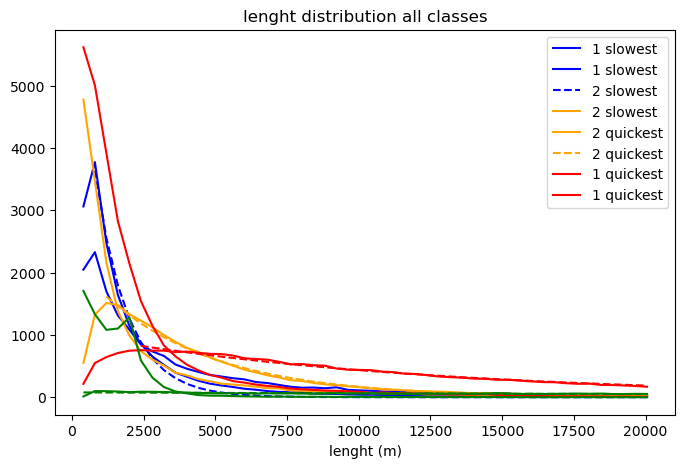

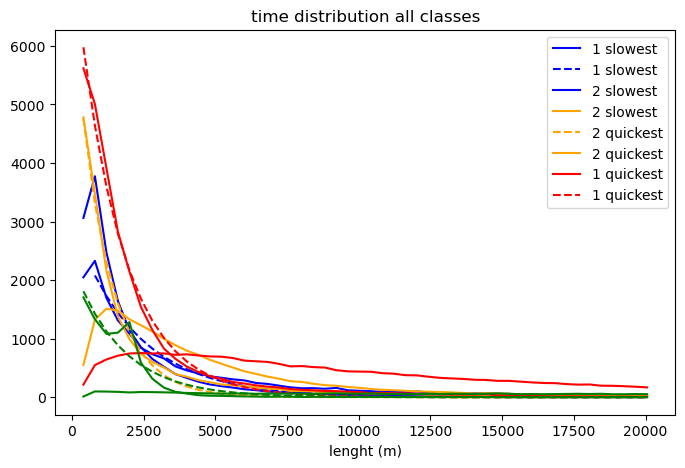

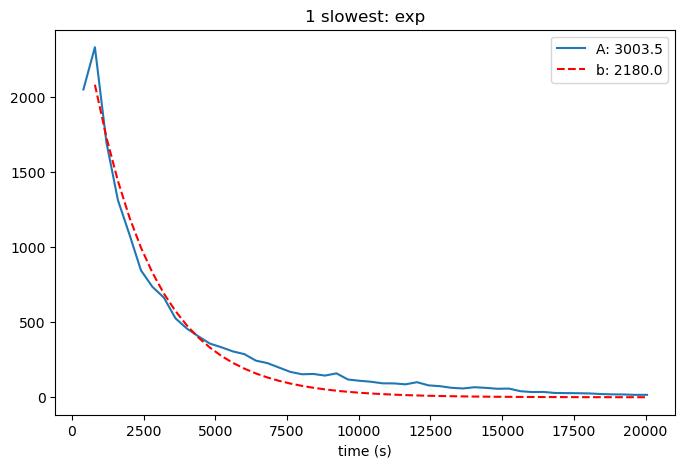

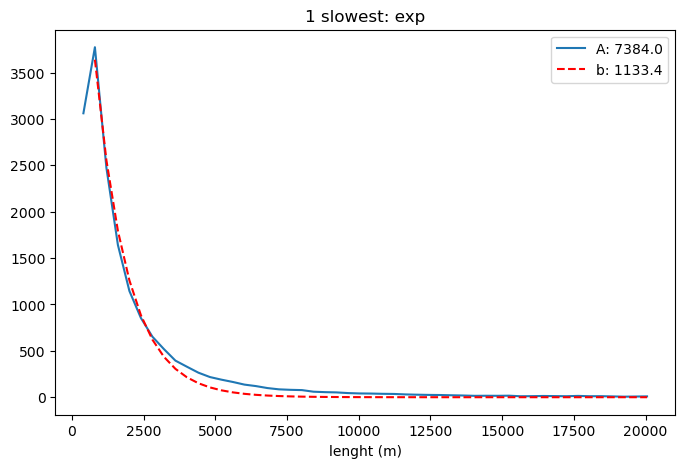

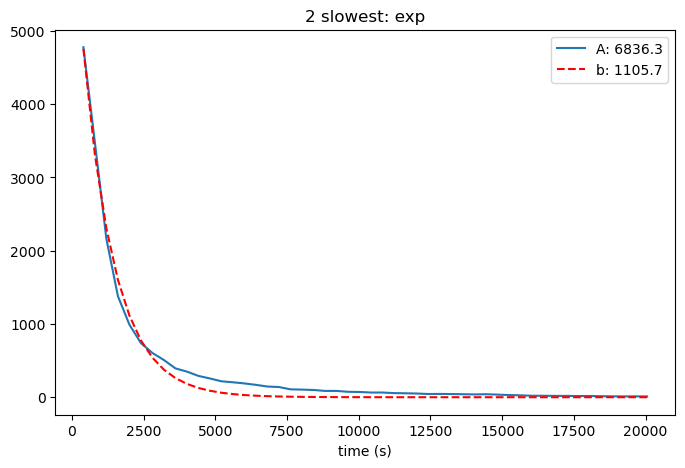

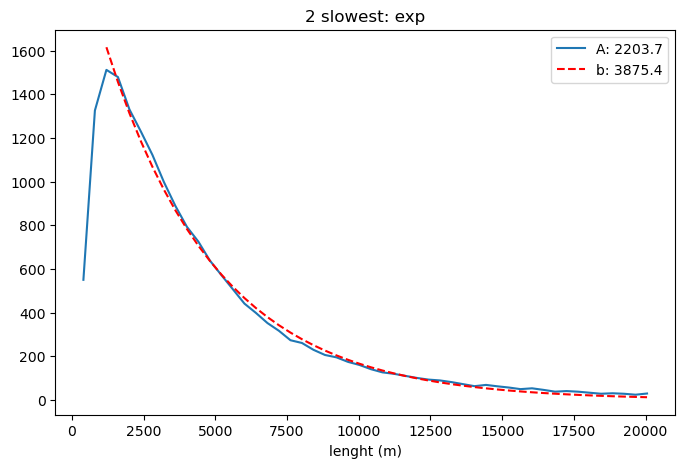

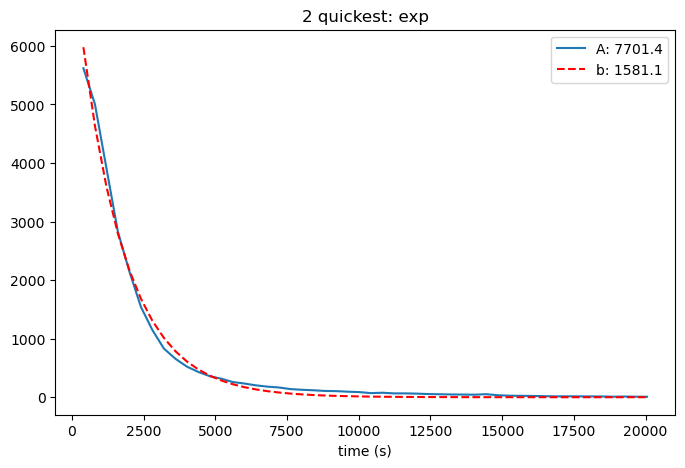

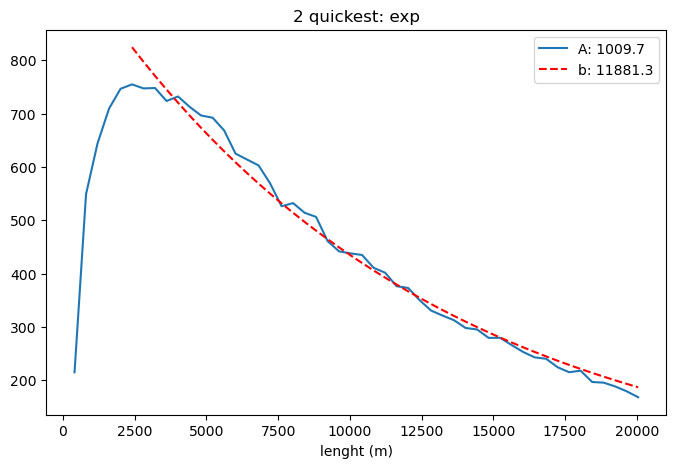

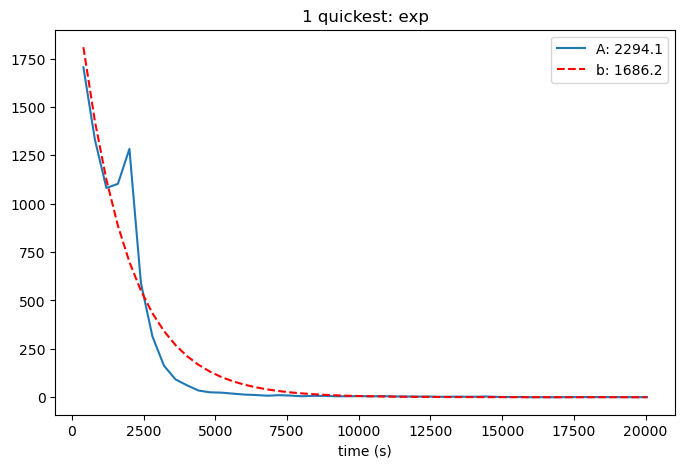

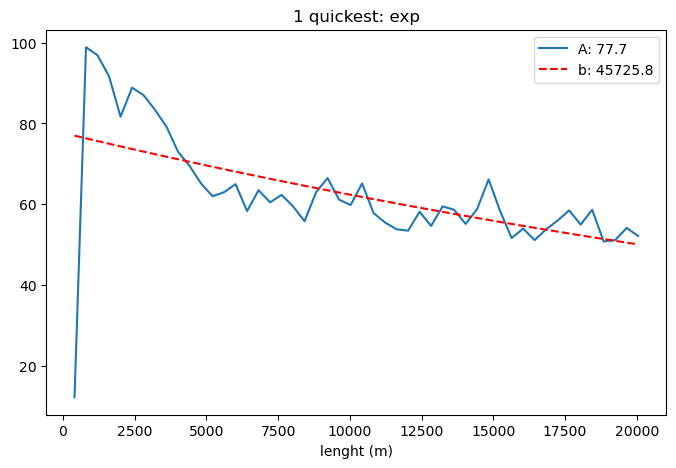

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import powerlaw
import warnings
import scipy.stats
import scipy.optimize as opt 
warnings.filterwarnings("ignore")

density = defaultdict(dict)
binning = defaultdict(dict)
av_density = defaultdict(dict)
av_bins = defaultdict(dict)

for cl in list_dict_name[0].keys():
    if len(list_dict_name[0][cl])!=0:
        density[list_dict_name[0][cl]] = {'lenght':[],'time':[]}
        binning[list_dict_name[0][cl]] = {'lenght':[],'time':[]}
        av_density[list_dict_name[0][cl]] = {'lenght':[],'time':[]}
        av_bins[list_dict_name[0][cl]] = {'lenght':[],'time':[]}
        
    for i in range(len(list_dict_name)):
        for cl1 in list_dict_name[0].keys():
            if list_dict_name[0][cl]==list_dict_name[i][cl1] and len(list_dict_name[0][cl])!=0:
                users = fcm[i].groupby('class').get_group(cl1)['id_act']
                stats_data = stats[i].loc[stats[i]['id_act'].isin(users)]
                for key in ['time','lenght']:
                    if len(density[list_dict_name[0][cl]][key])==0:
                        n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 20000 + 50),density = False)
                        n = np.reshape(n,(len(n),1))
                        bins = np.reshape(bins,(len(bins),1))
                        density[list_dict_name[0][cl]][key] = n
                        binning[list_dict_name[0][cl]][key] = bins
                    else:
                        n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 20000 + 50),density = False)
                        n = np.reshape(n,(len(n),1))
                        bins = np.reshape(bins,(len(bins),1))        
                        density[list_dict_name[0][cl]][key] = np.append(density[list_dict_name[0][cl]][key],n,axis = 1)
                        binning[list_dict_name[0][cl]][key] = np.append(binning[list_dict_name[0][cl]][key],bins,axis = 1)

for cl in list_dict_name[0].keys():
    for key in ['time','lenght']:
        if len(list_dict_name[0][cl])!=0:
            density[list_dict_name[0][cl]][key] = np.asmatrix(density[list_dict_name[0][cl]][key]) # [#day,#density_time]
            av_density[list_dict_name[0][cl]][key] = density[list_dict_name[0][cl]][key].mean(axis = 1) 
            av_density[list_dict_name[0][cl]][key] = np.asarray(av_density[list_dict_name[0][cl]][key]).flatten() 
            binning[list_dict_name[0][cl]][key] = np.asmatrix(binning[list_dict_name[0][cl]][key]) # [#day,#density_time]
            av_bins[list_dict_name[0][cl]][key] = binning[list_dict_name[0][cl]][key].mean(axis = 1) 
            av_bins[list_dict_name[0][cl]][key] = np.asarray(av_bins[list_dict_name[0][cl]][key]).flatten() 

index_time_exp = 0
index_time_plaw = 0
index_lenght_exp = 0
index_lenght_plaw = 0
dict_fit = defaultdict(dict)
figl,axl = plt.subplots(1,1,figsize = (8,5))
figl,axt = plt.subplots(1,1,figsize = (8,5))
legendl = []
legendt = []
colors = {'1 slowest':'blue','2 slowest':'orange','2 quickest':'red','1 quickest':'green'}
for cl in list_dict_name[0].keys():
    print(list_dict_name[0][cl])
    dict_fit[list_dict_name[0][cl]] = {'lenght':{'fit_pars':[],'binned_exp':[],'av_bins':[],'av_density':[]},'time':{'fit_pars':[],'binned_exp':[],'av_bins':[],'av_density':[]}}
    for key in ['time','lenght']:
        names = ['exp']#['exp','plaw']
        succession_indices_lenght_av_bins = [2,3,6,1]
        succession_indices_time_av_bins = [2,1,1,1]
        fit_ = True
        if fit_:
            if len(list_dict_name[0][cl])!=0:
                if key == 'lenght':
                    unit = 'm'
                    if list_dict_name[0][cl] == '1 slowest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][2:],  av_density[list_dict_name[0][cl]][key][1:],  p0=(3773,1100))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][2:],  av_density[list_dict_name[0][cl]][key][1:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][2:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][2:]**(-res_plaw1[0][0])]
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][1:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][1:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)
                    if list_dict_name[0][cl] == '2 slowest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][3:],  av_density[list_dict_name[0][cl]][key][2:],  p0=(1511,3800))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][3:],  av_density[list_dict_name[0][cl]][key][2:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][3:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][3:]**(-res_plaw1[0][0])]
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][2:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][2:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                    if list_dict_name[0][cl] == '2 quickest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][6:],  av_density[list_dict_name[0][cl]][key][5:],  p0=(754,5000))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][6:],  av_density[list_dict_name[0][cl]][key][5:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][6:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][6:]**(-res_plaw1[0][0])]
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][5:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][5:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                    if list_dict_name[0][cl] == '1 quickest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(98,1000))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][1:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][1:]**(-res_plaw1[0][0])]
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][:]))                        
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                else:
                    unit = 's'
                    if list_dict_name[0][cl] == '1 slowest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][2:],  av_density[list_dict_name[0][cl]][key][1:],  p0=(3003,2180))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][2:],  av_density[list_dict_name[0][cl]][key][1:],  p0=(1,267672))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][2:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][2:]**(-res_plaw1[0][0])]
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][1:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][1:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][1:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                    if list_dict_name[0][cl] == '2 slowest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(4700,7300))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][1:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][1:]**(-res_plaw1[0][0])]                    
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                    if list_dict_name[0][cl] == '2 quickest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(5600,1580))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][1:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][1:]**(-res_plaw1[0][0])]                    
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                    if list_dict_name[0][cl] == '1 quickest':
                        res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(1700,800))
                        res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[list_dict_name[0][cl]][key][1:],  av_density[list_dict_name[0][cl]][key][:],  p0=(1,412500))            
                        list_functions = [res_exp1[0][0]*np.exp(-av_bins[list_dict_name[0][cl]][key][1:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[list_dict_name[0][cl]][key][1:]**(-res_plaw1[0][0])]                    
                        cost_plaw = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[1])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        cost_exp = np.sum(np.sqrt((av_density[list_dict_name[0][cl]][key][:]-list_functions[0])**2)/len(av_density[list_dict_name[0][cl]][key][:]))
                        print('class: ',list_dict_name[0][cl],' ',key,' cost expo: ',cost_exp,' cost plaw: ',cost_plaw)                    
                dict_fit[list_dict_name[0][cl]][key]['fit_pars'] = res_exp1  
                dict_fit[list_dict_name[0][cl]][key]['binned_exp'] = list_functions[0]                  
                for i in range(len(list_functions)-1):
                    fig,ax = plt.subplots(1,1,figsize = (8,5))
                    ax.plot(av_bins[list_dict_name[0][cl]][key][1:],av_density[list_dict_name[0][cl]][key])
                    axl.plot(av_bins[list_dict_name[0][cl]][key][1:],av_density[list_dict_name[0][cl]][key],color = colors[list_dict_name[0][cl]])
                    legendl.append(list_dict_name[0][cl])                    
                    axt.plot(av_bins[list_dict_name[0][cl]][key][1:],av_density[list_dict_name[0][cl]][key],color = colors[list_dict_name[0][cl]])
                    legendt.append(list_dict_name[0][cl])
                    if key=='lenght':
                        print('name: ',names[i])
                        if i == 0:
                            dict_fit[list_dict_name[0][cl]][key]['av_bins'] = av_bins[list_dict_name[0][cl]][key][succession_indices_lenght_av_bins[index_lenght_exp]:]
                            dict_fit[list_dict_name[0][cl]][key]['av_density'] = av_density[list_dict_name[0][cl]][key][succession_indices_lenght_av_bins[index_lenght_exp] -1:]                             
                            ax.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_lenght_av_bins[index_lenght_exp]:],list_functions[i],linestyle = '--',color = 'red')
                            axl.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_lenght_av_bins[index_lenght_exp]:],list_functions[i],linestyle = '--',color = colors[list_dict_name[0][cl]])
                            index_lenght_exp +=1
                        else:
                            ax.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_lenght_av_bins[index_lenght_plaw]:],list_functions[i],linestyle = '--',color = 'red')                        
                            axl.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_lenght_av_bins[index_lenght_plaw]:],list_functions[i],linestyle = '--',color = colors[list_dict_name[0][cl]])                        
                            index_lenght_plaw += 1
                    else:
                        print('name: ',names[i])
                        if i == 0:
                            dict_fit[list_dict_name[0][cl]][key]['av_bins'] = av_bins[list_dict_name[0][cl]][key][succession_indices_time_av_bins[index_time_exp]:]  
                            dict_fit[list_dict_name[0][cl]][key]['av_density'] = av_density[list_dict_name[0][cl]][key][succession_indices_time_av_bins[index_time_exp]-1:]                              
                            ax.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_time_av_bins[index_time_exp]:],list_functions[i],linestyle = '--',color = 'red')
                            axt.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_time_av_bins[index_time_exp]:],list_functions[i],linestyle = '--',color = colors[list_dict_name[0][cl]])
                            index_time_exp +=1
                        else:
                            ax.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_time_av_bins[index_time_plaw]:],list_functions[i],linestyle = '--',color = 'red')                            
                            axt.plot(av_bins[list_dict_name[0][cl]][key][succession_indices_time_av_bins[index_time_plaw]:],list_functions[i],linestyle = '--',color = colors[list_dict_name[0][cl]])                                                        
                            index_time_plaw +=1      
                    legends = [[r'A: {0}'.format(round(res_exp1[0][0],1)),'b: {0}'.format(round(res_exp1[0][1],1))],[r'A: {0}'.format(round(res_plaw1[0][1],1)),'a: {0}'.format(round(res_plaw1[0][0],1))]]     
                    ax.legend(legends[i])
                    ax.set_title(list_dict_name[0][cl]+': '+names[i])
                    ax.set_xlabel('{0} ({1})'.format(key,unit))            
                    axl.legend(legendl)
                    axl.set_title('lenght distribution all classes')
                    axl.set_xlabel('{0} ({1})'.format(key,unit))            
                    axt.set_title('time distribution all classes')
                    axt.set_xlabel('{0} ({1})'.format(key,unit))            
                    axt.legend(legendt)
                    
                    
                    ax.set_xscale('linear')
                    ax.set_yscale('linear')
                    axl.set_xscale('linear')
                    axl.set_yscale('linear')
                    axt.set_xscale('linear')
                    axt.set_yscale('linear')


                    fig.savefig(os.path.join('/home/aamad/codice/city-pro/output/bologna_mdt_detailed/all','fit_total_{0}_distribution_{1}_class_{2}.png'.format(key,'Bologna_mdt_detailed',list_dict_name[0][cl])),dpi = 200)
            fig.show()
#                    axl.savefig(os.path.join('/home/aamad/codice/city-pro/output/bologna_mdt_detailed/all','fit_total_{0}_distribution_{1}_class_{2}.png'.format(key,'Bologna_mdt_detailed',list_dict_name[0][cl])),dpi = 200)
#                    axt.savefig(os.path.join('/home/aamad/codice/city-pro/output/bologna_mdt_detailed/all','fit_total_{0}_distribution_{1}_class_{2}.png'.format(key,'Bologna_mdt_detailed',list_dict_name[0][cl])),dpi = 200)    
    figl.show()
    figt.show()
#                print('cost function exp:\n',quadr_error_exp)
#                print('cost function brown:\n',quadr_error_brown)
#                print('cost function p_law:\n',quadr_error_plaw)



In [100]:
pd.DataFrame(np.array([['fitted time alpha','error fit exp time','error fit plaw time','fitted lenght alpha','error fit exp lenght','error fit plaw lenght'],[2180,64,54,1133,50,60],[1105,76,130,3875,16,110],[1581,71,324,11881,14,53],[1686,46,136,1687,6,6]]).T,columns =['(FIT PARAMETERS-ERRORS)/CLASSES','1 slowest','2 slowest','2 quickest','1 quickest'])

,(FIT PARAMETERS-ERRORS)/CLASSES,1 slowest,2 slowest,2 quickest,1 quickest
0,fitted time alpha,2180,1105,1581,1686
1,error fit exp time,64,76,71,46
2,error fit plaw time,54,130,324,136
3,fitted lenght alpha,1133,3875,11881,1687
4,error fit exp lenght,50,16,14,6
5,error fit plaw lenght,60,110,53,6


# FITTING AGGREGATED CLASSES AND DAYS

finished fit time
plotting


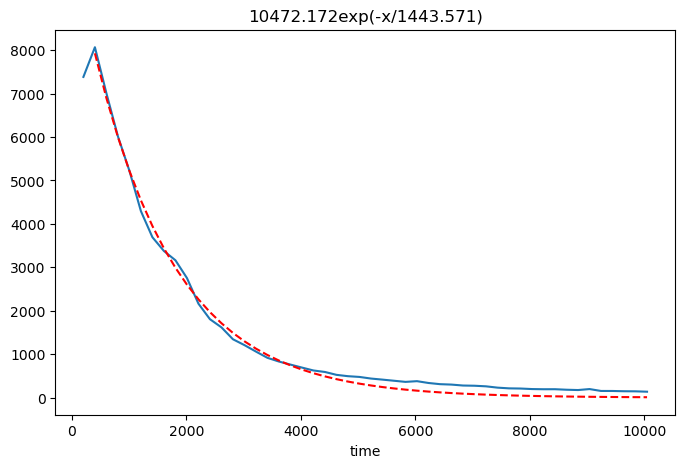

cost function exp:	 134.2367976819819


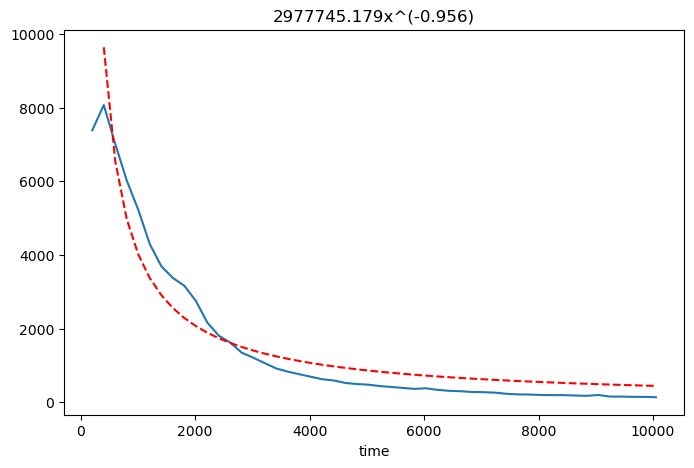

cost function plaw:	 427.709401268388
finished fit lenght
plotting


/tmp/ipykernel_9228/1385732986.py:101: RuntimeWarning: invalid value encountered in sqrt
  res_brown1 = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), av_bins[key][2:],  av_density[key][1:],  p0=(1014847.8,203721.1))


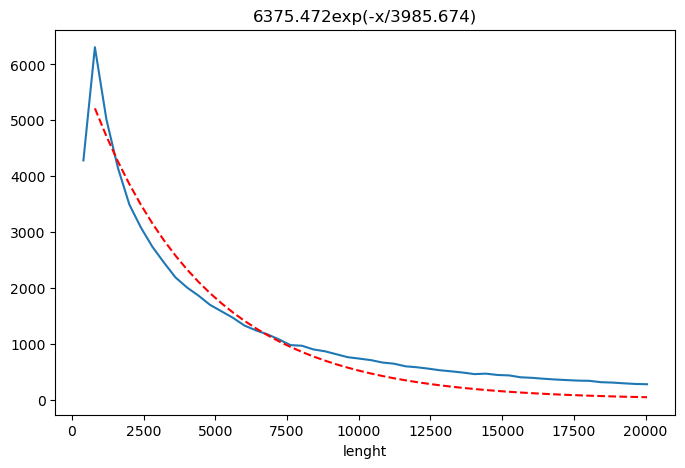

cost function exp:	 245.2891637906819


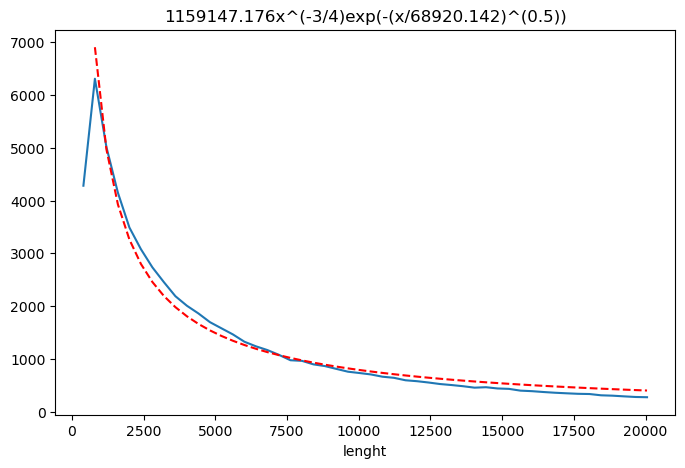

cost function brown:	 119.85790714227367


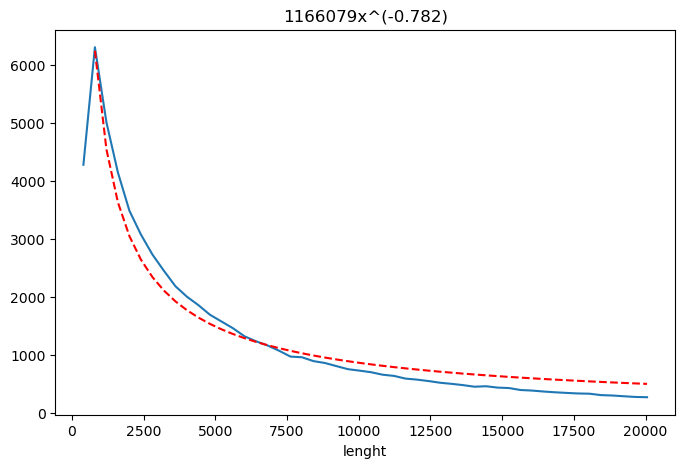

cost function plaw:	 788.927016039581


In [24]:
# FIT LUNGHEZZE
import scipy.optimize as opt
import os
import numpy as np
# EXPO BEST FIT
def get_best_exp_fit(amplitude_min,amplitude_max,characteristic_min,characteristic_max,bins,av_density):
    a_exp = np.linspace(amplitude_min,amplitude_max,10000)
    b_exp = np.linspace(characteristic_min,characteristic_max,100) 
    error = []
    c_exp = 1000000
    for i in range(len(b_exp)):
        for j in range(len(a_exp)):
            res_exp = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  bins[1:],  av_density,  p0=(a_exp[j],  b_exp[i]))
            cost = np.sqrt(np.sum((av_density-res_exp[0][0]*np.exp(-bins[1:]/res_exp[0][1]))**2))/len(av_density)
            if not np.isnan(cost):
                error.append(cost)
            if c_exp>cost:
                res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  bins[1:],  av_density,  p0=(a_exp[j],  b_exp[i]))
                c_exp = cost
    plt.plot(list(range(len(error))),error)
    plt.show()
    return res_exp1,c_exp
    
def get_best_brown_fit(amplitude_min,amplitude_max,characteristic_min,characteristic_max,bins,av_density):
    a_exp = np.linspace(amplitude_min,amplitude_max,10000)
    b_exp = np.linspace(characteristic_min,characteristic_max,100) 
    error = []
    c_exp = 1000000
    for i in range(len(b_exp)):
        for j in range(len(a_exp)):
            res_brown = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), bins[1:],  av_density,  p0=(a_exp[j],  b_exp[i]))
            cost = np.sqrt(np.sum((av_density-res_brown[0][0]*np.exp(-bins[1:]/res_brown[0][1]))**2))/len(av_density)
            if not np.isnan(cost):
                error.append(cost)
            if c_exp>cost:
                res_brown1 = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), bins[1:],  av_density,  p0=(a_exp[j],  b_exp[i]))
                c_exp = cost
    plt.plot(list(range(len(error))),error)
    plt.show()
    return res_brown1,c_exp
    

def get_best_pl_fit(amplitude_min,amplitude_max,characteristic_min,characteristic_max,bins,av_density):
    a_exp = np.linspace(amplitude_min,amplitude_max,10000)
    b_exp = np.linspace(characteristic_min,characteristic_max,100) 
    error = []
    c_exp = 1000000
    for i in range(len(b_exp)):
        for j in range(len(a_exp)):
            res_plaw = opt.curve_fit(lambda t,a,b: b*t**(-a),  bins[1:],  av_density,  p0=(a_exp[j],  b_exp[i]))
            cost = np.sqrt(np.sum((av_density-res_plaw[0][0]*np.exp(-bins[1:]/res_plaw[0][1]))**2))/len(av_density)
            if not np.isnan(cost):
                error.append(cost)
            if c_exp>cost:
                res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  bins[1:],  av_density,  p0=(a_exp[j],  b_exp[i]))
                c_exp = cost
    plt.plot(list(range(len(error))),error)
    plt.show()
    return res_plaw1,c_exp



fit_global = True
if fit_global:
    density = {'lenght':[],'time':[]}
    binning = {'lenght':[],'time':[]}
    for i in range(len(stats)):
        save_dir = os.path.join(s_dir[i],'fit')
        stats_data = stats[i]
        for key in ['time','lenght']:
            if len(density[key])==0:
                if key == 'lenght':
                    n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 20000 + 50),density = False)
                else:
                    n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 10000 + 50),density = False)                    
                n = np.reshape(n,(len(n),1))
                bins = np.reshape(bins,(len(bins),1))
                density[key] = n
                binning[key] = bins
            else:
                if key == 'lenght':
                    n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 20000 + 50),density = False)
                else:
                    n,bins = np.histogram(stats_data[key],bins = 50 ,range = (0, 10000 + 50),density = False)                    
                n = np.reshape(n,(len(n),1))
                bins = np.reshape(bins,(len(bins),1))        
                density[key] = np.append(density[key],n,axis = 1)
                binning[key] = np.append(binning[key],bins,axis = 1)
    av_density = {'lenght':[],'time':[]}
    av_bins = {'lenght':[],'time':[]}
    for key in ['time','lenght']:
        density[key] = np.asmatrix(density[key]) # [#day,#density_time]
        av_density[key] = density[key].mean(axis = 1) 
        av_density[key] = np.asarray(av_density[key]).flatten() 
        binning[key] = np.asmatrix(binning[key]) # [#day,#density_time]
        av_bins[key] = binning[key].mean(axis = 1) 
        av_bins[key] = np.asarray(av_bins[key]).flatten() 
        if key == 'lenght':
            unit = 'm'
            res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[key][2:],  av_density[key][1:],  p0=(6887.9,  3640.2))
            res_brown1 = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), av_bins[key][2:],  av_density[key][1:],  p0=(1014847.8,203721.1))
            res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[key][2:],  av_density[key][1:],  p0=(0.8,1166079))
            print('finished fit lenght')        
        else:
            unit = 's'
            res_exp1 = opt.curve_fit(lambda t,a,b: a*np.exp(-t/b),  av_bins[key][2:],  av_density[key][1:],  p0=(9527,  1571))
#            res_exp1,quadr_error_exp = get_best_exp_fit(5000,10000,1000,10000,av_bins[key],av_density[key])
#            res_brown1 = opt.curve_fit(lambda t,a,b: a*t**(-3/4)*np.exp(-(t/b)**0.5), av_bins[key][1:],  av_density[key],  p0=(2041168,8343))
#            res_brown1,quadr_error_brown = get_best_brown_fit(60000,110000,100000,210000,av_bins[key],av_density[key])
            res_plaw1 = opt.curve_fit(lambda t,a,b: b*t**(-a),  av_bins[key][2:],  av_density[key][1:],  p0=(1,412500))
#            res_plaw,quadr_error_plaw = get_best_pl_fit(0,2,max(av_density[key])/2,2*max(av_density[key]),av_bins[key],av_density[key])
            print('finished fit time')
        if key == 'lenght':
            list_functions = [res_exp1[0][0]*np.exp(-av_bins[key][2:]/res_exp1[0][1]),res_brown1[0][0]*av_bins[key][2:]**(-3/4)*np.exp(-(av_bins[key][2:]/res_brown1[0][1])**0.5),1166079*av_bins[key][2:]**(-0.782)]
            list_names = ['exp','brown','plaw']
            list_titles = [r'{0}exp(-x/{1})'.format(round(res_exp1[0][0],3),round(res_exp1[0][1],3)),r'{0}x^(-3/4)exp(-(x/{1})^(0.5))'.format(round(res_brown1[0][0],3),round(res_brown1[0][1],3)),r'{0}x^(-{1})'.format(round(1166079,3),round(0.782,3))]#res_plaw[0][0]
            list_errors = [np.sum(np.sqrt((av_density[key][1:]-res_exp1[0][0]*np.exp(-av_bins[key][2:]/res_exp1[0][1]))**2))/50,np.sum(np.sqrt((av_density[key][1:] -res_brown1[0][0]*av_bins[key][2:]**(-3/4)*np.exp(-(av_bins[key][2:]/res_brown1[0][1])**0.5))**2))/50,np.sum(np.sqrt((av_density[key][1:]-res_plaw1[0][1]*av_bins[key][2:]**(-0.782))**2))/50]#res_plaw[0][0]
        else:
            list_functions = [res_exp1[0][0]*np.exp(-av_bins[key][1:]/res_exp1[0][1]),res_plaw1[0][1]*av_bins[key][1:]**(-res_plaw1[0][0])]                
            list_names = ['exp','plaw']
            list_titles = [r'{0}exp(-x/{1})'.format(round(res_exp1[0][0],3),round(res_exp1[0][1],3)),r'{0}x^(-{1})'.format(round(res_plaw1[0][1],3),round(res_plaw1[0][0],3))]
            list_errors = [np.sum(np.sqrt((av_density[key][1:]-res_exp1[0][0]*np.exp(-av_bins[key][2:]/res_exp1[0][1]))**2))/50,np.sum(np.sqrt((av_density[key][1:]-res_plaw1[0][1]*av_bins[key][2:]**(-res_plaw1[0][0]))**2))/50]

        print('plotting')
        for i in range(len(list_functions)):
            if key=='time' and list_names[i]=='brown':
                continue
            else:
                fig,ax = plt.subplots(1,1,figsize = (8,5))
                plt.plot(av_bins[key][1:],av_density[key])
                if key=='lenght':
                    plt.plot(av_bins[key][2:],list_functions[i][:],linestyle = '--',color='red')
                else:

                    plt.plot(av_bins[key][2:],list_functions[i][1:],linestyle = '--',color='red')
                plt.title(list_titles[i])
                plt.xlabel(key)
#                ax.set_xscale('log')
#                ax.set_yscale('log')
                plt.savefig(os.path.join('/home/aamad/codice/city-pro/output/bologna_mdt_detailed/all','fit_{0}_total_{1}_distribution_{2}.png'.format(list_names[i],key,'Bologna_mdt_detailed')),dpi = 200)
                plt.show()
                print('cost function {}:\t'.format(list_names[i]),list_errors[i])



In [ ]:
import numpy as np
def quadratic_loss(data,function,x,*pars):
    '''
    data: array of data
    function: function to fit
    '''
    return np.sum((np.array(data)-function(np.array(x),*pars))**2)
def quadratic_gradient(x,data,function,d_function,*pars):
    '''
    data: array of data
    function: function to fit
    '''
    return np.sum(2*(np.array(data)-function(np.array(x),*pars))*d_function(np.array(x),*pars) )

def power_law(x,alpha):
    return x**alpha

def d_power_law(x,alpha):
    return np.log(x)*x**(alpha)

def exponential(x,sigma):
    return np.exp(-x/sigma)
def d_exponential(x,sigma):
    return x/(sigma**2)*np.exp(-x/sigma)


def update_alpha_gd(alpha,gradient,learning_rate):
    return alpha - learning_rate*gradient

learning_rate = 0.00001
alpha_0 = -1
x_min = 0
x_max = 20000
alphas= []
loss_= []

for i in range(1000000):
    alpha_0 = update_alpha_gd(alpha_0,quadratic_gradient(bins[1:],av_density,power_law,d_power_law,alpha_0),learning_rate)
    print(alpha_0)
    alphas.append(alpha_0)
    loss_.append(quadratic_loss(av_density,power_law,bins[1:],alpha_0))
plt.plot(alphas,loss_)
plt.title('power law')
plt.xlabel('alpha')
plt.ylabel('loss')
plt.show()

plt.plot(bins[1:],av_density)
plt.plot(bins[1:],bins[1:]**alpha_0,linestyle = '--',color = 'red')
plt.title('power law')
plt.xlabel('lenght (m)')
plt.ylabel('count')
plt.show()
alphas= []
loss_= []

for i in range(10000):
    alpha_0 = update_alpha_gd(alpha_0,quadratic_gradient(bins[1:],av_density,exponential,d_exponential,alpha_0),learning_rate)
    alphas.append(alpha_0)
    loss_.append(quadratic_loss(av_density,exponential,bins[1:],alpha_0))
plt.plot(alphas,loss_)
plt.title('power law')
plt.xlabel('alpha')
plt.ylabel('loss')
plt.show()
plt.plot(bins[1:],av_density)
plt.plot(bins[1:],exponential(bins[1:],alpha_0),linestyle = '--',color = 'red')
plt.title('power law')
plt.xlabel('lenght (m)')
plt.ylabel('count')
plt.show()



# PLOTS THOSE CASES WITH ANOMALOUS VELOCITIES: (In the analysis we keep some traj: [less 0.1%] that have velocities bigger than 50 m/s)

In [ ]:
from shapely.geometry import Point,Polygon
import folium
from mpl_toolkits.mplot3d import axes3d

def info_plot(frontin,tailin,points_in_box,points_in_box_fcm,tmp,pth):
    print('number of front points in the bounding box:\t',len(frontin))
    print('number of tail points in the bounding box:\t',len(tailin))
    print('number of points in box:\t',len(points_in_box))
    print('number of points in box fcm:\t',len(points_in_box_fcm))
    print('lenght of stats in class 1:\t',len(tmp))
    print('fraction of identification in bounding box:\t',len(points_in_box)/len(tmp))
    print('average velocity in bounding box:\t',np.mean(points_in_box_fcm['av_speed'].to_numpy()))
    fig,ax = plt.subplots(1,1,figsize = (10,8))
    n,bins = np.histogram(points_in_box_fcm['av_speed'].to_numpy())
    plt.scatter(bins[:-1],n)
    plt.xlabel('average velocity (m/s)')
    plt.ylabel('count')
    plt.title('class second quickest')
    plt.savefig(os.path.join(pth,'velocity_distribution_second_fastest_class_in_bb_center.png'),dpi = 200)
    fig,ax = plt.subplots(1,1,figsize = (10,8))
    n,bins = np.histogram(points_in_box_fcm['lenght'].to_numpy())
    plt.scatter(bins[:-1],n)
    plt.xlabel('lenght (m)')
    plt.ylabel('count')
    plt.title('class second quickest')
    plt.savefig(os.path.join(pth,'distance_distribution_second_fastest_class_in_bb_center.png'),dpi = 200)
    fig,ax = plt.subplots(1,1,figsize = (10,8))
    n,bins = np.histogram(points_in_box_fcm['time'].to_numpy())
    plt.scatter(bins[:-1],n)
    plt.xlabel('time (s)')
    plt.ylabel('count')
    plt.title('class second quickest')
    plt.savefig(os.path.join(pth,'time_distribution_second_fastest_class_in_bb_center.png'),dpi = 200)

def plot_conditional3D(points_in_box,key1,key2):


    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X = points_in_box[key1].to_numpy() 
    Y = points_in_box[key2].to_numpy()
    Z,xedges,yedges = np.histogram2d(X,Y)
    Z = Z.T
    x = np.array(xedges)[:-1]
    y = np.array(yedges)[:-1]
    xmax = max(X)
    xmin = min(X)
    ymax = max(Y)
    ymin = min(Y)
    zmax = np.max(Z)
    ax.bar(x, y, zs=Z, zdir='y', alpha=0.8)
    ax.set_xlabel(key1)
    ax.set_ylabel(key2)
    ax.set_zlabel('count')
    # On the y-axis let's only label the discrete values that we have data for.
    plt.show()    



def countour_plot(points_in_box,key1,key2):
    ax = plt.figure(figsize= (10,8)).add_subplot(projection='3d')
    X = points_in_box[key1].to_numpy() 
    Y = points_in_box[key2].to_numpy()
    Z,xedges,yedges = np.histogram2d(X,Y)
    Z = Z.T
    x = np.array(xedges)[:-1]
    y = np.array(yedges)[:-1]
    for i in range(len(xedges[:-1])-1):
        x = np.row_stack((x,xedges[:-1]))
        y = np.row_stack((y,yedges[:-1]))
    print(Z)
    print(np.shape(x),x)
    print(np.shape(y),y)
    xmax = max(X)
    xmin = min(X)
    ymax = max(Y)
    ymin = min(Y)
    zmax = np.max(Z)
    # Plot the 3D surface
    ax.plot_surface(x,y , Z, edgecolor='royalblue', lw=0.5, rstride=2, cstride=2,
                    alpha=0.2)

    # Plot projections of the contours for each dimension.  By choosing offsets
    # that match the appropriate axes limits, the projected contours will sit on
    # the 'walls' of the graph.
    ax.contourf(x, y, Z, zdir='z', offset=0, cmap='coolwarm')
    ax.contourf(x, y, Z, zdir='x', offset=xmin, cmap='coolwarm')
    ax.contourf(x, y, Z, zdir='y', offset=ymin, cmap='coolwarm')

    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, zmax + 1),
        xlabel=key1, ylabel=key2, zlabel='count')

    plt.show()


def spatial_filtering_per_country(tmp,bounding_box,pth):
    ''' Type -> all_in
    
    US:[(18.91619,-171.791110603 ), (71.3577635769,-171.791110603), (71.3577635769, -66.96466),(18.91619,-66.96466 ) ]'''
    l=list(zip(tmp['front_lat'],tmp['front_lon']))
    l1=list(zip(tmp['tail_lat'],tmp['tail_lon']))
    pointsfront = [Point(ll) for ll in l]
    pointstail = [Point(ll) for ll in l1]
    polygon= Polygon(bounding_box)
    mask=[point.within(polygon) for point in pointsfront]
    mask1=[point.within(polygon) for point in pointstail]
    frontin=tmp.loc[mask]['id_act'] 
    tailin=tmp.loc[mask1]['id_act']
    maskfcm = [True if x in frontin.to_numpy() or x in tailin.to_numpy() else False for x in fcm_data['id_act'].to_numpy()]
    maskstats = [True if x in frontin.to_numpy() or x in tailin.to_numpy() else False for x in tmp['id_act'].to_numpy()]
    points_in_box = tmp.loc[maskstats]
    coords_in_box = list(zip(points_in_box['front_lat'],points_in_box['front_lon']))
    coords_in_box1 = list(zip(points_in_box['tail_lat'],points_in_box['tail_lon']))
    points_in_box_fcm = fcm_data.loc[maskfcm]
    info_plot(frontin,tailin,points_in_box,points_in_box_fcm,tmp,pth)
    countour_plot(points_in_box,'time','av_speed')
    countour_plot(points_in_box,'lenght','av_speed')
    countour_plot(points_in_box,'lenght','time')
    return points_in_box,coords_in_box,coords_in_box1
for i in range(len(fcm)):
    for j in range(len(list_dict_name[i].keys())):
        if list_dict_name[i][j] == '1 quickest':
            list_act = fcm[i].groupby('class').get_group(j)['id_act'].to_numpy()
            mask = [True if x in list_act else False for x in stats[i]['id_act'].to_numpy()]
            tmp = stats[i].loc[mask]
            points_in_box,coords_in_box,coords_in_box1 = spatial_filtering_per_country(tmp,bounding_box,pth)
            center = np.mean(np.asarray(coords_in_box),axis = 0)
            map_ = folium.Map(location=center, zoom_start=9,control_scale=True)
            c = 0
            for coord in np.asarray(coords_in_box)[:400]:
                folium.Marker([coord[0],coord[1]], popup=str(points_in_box['av_speed'].to_numpy()[c]) + ' (m/s)  ' + str(points_in_box['id_act'].to_numpy()[c]) + ' ' + str(points_in_box['lenght'].to_numpy()[c]) + ' m').add_to(map_)
                folium.Marker([coords_in_box1[c][0],coords_in_box1[c][1]], popup=str(points_in_box['av_speed'].to_numpy()[c]) + ' (m/s)  ' + str(points_in_box['id_act'].to_numpy()[c]) + ' ' + str(points_in_box['lenght'].to_numpy()[c]) + ' m').add_to(map_)
                c+=1
            map_.save(os.path.join(s_dir[i],'map-quickest-insidebox_start_end.html'))

# TRASFORMAZIONE FILE GZIP IN CSV DA DARE IN PASTO A DATA_ANALYSIS.cpp
# Si trova in configurazione completa in mdt_converter.py -> lo lascio anche qua perchè non ricordo bene.

In [16]:
# MICHELETTI
def sum_string(x,y):
    return [datetime.datetime.strptime(x.iloc[i] +' '+ y.iloc[i].split('.')[0],"%Y-%m-%d %H:%M:%S") for i in range(len(x))]

def city_pro_fit_data(df,small_filename,save_dir):
    df = df.sort_values('CALL_ID')   
    mapper = {'Unnamed: 0': 'ID_TRIP','CALL_ID':'CALL_ID','LATITUDE':'LAT','LONGITUDE':'LON','datetime':'timestamp'}
    df = df.rename(columns = mapper)
    tst = np.array(df['timestamp'])
    if type(tst[0]) == np.datetime64:
        df['timestamp'] = [(tst[i]- np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's') for i in range(len(tst))]
    else:
        df['timestamp'] = [datetime.datetime.strptime(tst[i],"%Y-%m-%d %H:%M:%S").timestamp() for i in range(len(tst))]     
    df = df[['CALL_ID','timestamp','LAT','LON']]
    df.to_csv(os.path.join(save_dir,small_filename),';', index = False)

def city_pro_fit_data_alternative(df,small_filename,save_dir):
    df = df.sort_values('CALL_ID')   
    call_id_unique = np.unique(df.CALL_ID.to_numpy())
    for call_id in call_id_unique:
    mapper = {'Unnamed: 0': 'ID_TRIP','CALL_ID':'CALL_ID','LATITUDE':'LAT','LONGITUDE':'LON','datetime':'timestamp'}
    df = df.rename(columns = mapper)
    tst = np.array(df['timestamp'])
    if type(tst[0]) == np.datetime64:
        df['timestamp'] = [(tst[i]- np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's') for i in range(len(tst))]
    else:
        df['timestamp'] = [datetime.datetime.strptime(tst[i],"%Y-%m-%d %H:%M:%S").timestamp() for i in range(len(tst))]     
    df = df[['CALL_ID','timestamp','LAT','LON']]
    df.to_csv(os.path.join(save_dir,"alternative_"+small_filename),';', index = False)

def cut_tdm_files(work_dir,filename,save_dir,start_date,end_date,list_columns,list_columns_to_save,num_chunks,chunk_size,passive,debug = False):
    '''Input:
    work_dir: path to big file
    filename: name of big file
    save_dir: path to save smaller files
    num_chunks: 
    chunk_size: number of rows of uploaded piece of dataframe
    
    ----------------------------------
    Description:
    1) Takes a big file of activities of telecom data.
    2) Chooses time window to study and create csv file in that window
    3) Saves it as a file named bologna_mdt_{start_date}_{end_date}.csv
    '''
    str_start_date = start_date.strftime("%Y-%m-%d")
    str_end_date = end_date.strftime("%Y-%m-%d")
    big_file = pd.read_csv(os.path.join(work_dir,filename), chunksize=chunk_size)
    for i, chunk in tqdm(enumerate(big_file)):
        if i == 0 or new_:            
            chunk['datetime'] = sum_string(chunk['DATE'],chunk['TIME'])
            chunk = chunk.sort_values(by = 'datetime')
            if debug:
                print('latest time',chunk.iloc[-1]['datetime'])
                print('youngest time',chunk.iloc[0]['datetime'])
            new = chunk[list_columns_to_save].loc[chunk['datetime']>=start_date]
            new = new[list_columns_to_save].loc[chunk['datetime']<=end_date]
            new_ = False
            if debug:
                print('length new',len(new))
        else:
            chunk['datetime'] = sum_string(chunk['DATE'],chunk['TIME'])
            chunk = chunk.sort_values(by = 'datetime')
            df_tmp = chunk[list_columns_to_save].loc[chunk['datetime']>=start_date]
            df_tmp = df_tmp[list_columns_to_save].loc[chunk['datetime']<=end_date]
            new = pd.concat([new,df_tmp],ignore_index = True,verify_integrity = True)
            new1 = new
            if debug and len(new)>0:
                print('length new', len(new))
                if len(new)<=200000 and len(new)>0:
                    print(new.columns)
                    print(new)
    new = new.sort_values(by = 'datetime')
    if passive:
        small_filename = f'bologna_mdt_{str_start_date}_{str_end_date}_passive.csv'
    else:
        small_filename = f'bologna_mdt_{str_start_date}_{str_end_date}_active.csv'
    city_pro_fit_data(new,small_filename,save_dir)
    city_pro_fit_data_alternative(new1,small_filename,save_dir)
    new_ = True



In [28]:
import pandas as pd
import numpy as np
d = pd.read_csv(r'G:\mdt bologna\dati_decompressi_ad_aprile\febbraio.csv',',',chunksize=100000)
col1 = ['CALL_ID']
cols = ['ENB_UE_S1AP_ID','MME_UE_S1AP_ID','MTMSI']

def extract_columns(d,col1,col2,call_id,enb_id,par_=50):
    for i, chunk in enumerate(d):
        if i <par_:
            call_id.extend(chunk[col1].to_numpy())
            enb_id.extend(chunk[col2].to_numpy())
        else:
            break
    call_id = np.array(call_id)
    enb_id = np.array(enb_id)
#    print("considered: ",par_/i," of total data points")
    return call_id,enb_id
def compare_columns(call_id,enb_id,c,size_window = 10):
    debug = False
    unique_call = len(np.unique(call_id))
    unique_enb = len(np.unique(enb_id))
    print('unique call: ',unique_call,' unique {}'.format(c),unique_enb)
    elements_matching = 0
    unwanted_changed_cells = 0
    stable_cell_changing_call = 0
    for e in range(len(call_id)-1):
        if call_id[e]== call_id[e+1] and enb_id[e]==enb_id[e+1]:
            if debug:
                print(e)
                print('\tcase elements_matching')
                print("call ",call_id[e]," " ,call_id[e+1])
                print("{} ".format(c),enb_id[e]," " ,enb_id[e+1])

            elements_matching += 1 
        elif call_id[e] == call_id[e+1] and enb_id[e]!=enb_id[e+1]:
            if debug:
                print(e)
                print('\tcase unwanted_changed_cells')
                print("call ",call_id[e]," " ,call_id[e+1])
                print("{} ".format(c),enb_id[e]," " ,enb_id[e+1])

            unwanted_changed_cells+=1
        elif call_id[e]!= call_id[e+1] and enb_id[e]==enb_id[e+1]:
            stable_cell_changing_call+=1
                    
        elif call_id[e]!= call_id[e+1] and enb_id[e]!=enb_id[e+1]:
            if debug:
                print('\tcase elements_matching')                    
                print("call ",call_id[e]," " ,call_id[e+1])
                print("{} ".format(c),enb_id[e]," " ,enb_id[e+1])
            
            elements_matching += 1
            pass
    print('total number of elements parsed: ',len(call_id))
    print('total number of singular attribution matching call_id-{}: '.format(c),elements_matching)
    print('total number of unwanted changes of cell call_id-{}: '.format(c),unwanted_changed_cells)
    print('total number of stable cell signal {} but changing call_id (loss of info using call_id): '.format(c),stable_cell_changing_call)
    
    return True
for c in cols:
    call_id = []
    enb_id = []
    call_id,enb_id = extract_columns(d,col1,c,call_id,enb_id)
    compare_columns(call_id,enb_id,c)


c:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (19,47,50) have mixed ty

unique call:  2177044  unique ENB_UE_S1AP_ID 1693086
total number of elements parsed:  5000000
total number of singular attribution matching call_id-ENB_UE_S1AP_ID:  4999785
total number of unwanted changes of cell call_id-ENB_UE_S1AP_ID:  2
total number of stable cell signal ENB_UE_S1AP_ID but changing call_id (loss of info using call_id):  212


C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (19,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (19,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for 

unique call:  2234137  unique MME_UE_S1AP_ID 2220272
total number of elements parsed:  5000000
total number of singular attribution matching call_id-MME_UE_S1AP_ID:  4963736
total number of unwanted changes of cell call_id-MME_UE_S1AP_ID:  35458
total number of stable cell signal MME_UE_S1AP_ID but changing call_id (loss of info using call_id):  805


C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (19,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(d):
C:\Users\Alberto\AppData\Local\Temp\ipykernel_11084\607802085.py:8: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, 

unique call:  2045316  unique MTMSI 60459
total number of elements parsed:  5000000
total number of singular attribution matching call_id-MTMSI:  4892793
total number of unwanted changes of cell call_id-MTMSI:  25
total number of stable cell signal MTMSI but changing call_id (loss of info using call_id):  107181


# STOP: WORTHY ANALYSIS ABOVE: 
## Below just try new snippets